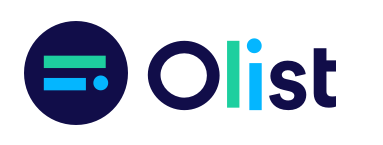

# 📚 <span style='color:#0D2BA5'>Mission - Segmentez des clients d'un site e-commerce</span>

# <font color='DodgerBlue'>SOMMAIRE<font></a>
    
### <a href="#C1"><font color='DodgerBlue'> 1.Préparation des données </a>
******    
### <a href="#C2"><font color='DodgerBlue'>2. Faeture Engineering</a>
******    
   - <a href="#C3"><font color='RoyalBlue'>2.1 Les 3 indicateurs RFM</a>
   - <a href="#C4"><font color='RoyalBlue'>2.2 Les indicateurs de segmentation démographique</a>
   - <a href="#C5"><font color='RoyalBlue'>2.3 Les indicateurs de segmentation géographique</a>
   - <a href="#C6"><font color='RoyalBlue'>2.4 Les indicateurs de segmentation comportementale</a>
******
### <a href="#C7"><font color='DodgerBlue'>3. Segmentation RFM</a>
******
   - <a href="#C8"><font color='RoyalBlue'>**3.1 Segmentation RFM par Quantiles**</a>
******
   - <a href="#C9"><font color='RoyalBlue'>3.1.1 Calcul des scores RFM en fonction des quantiles pour chaque client</a>
   - <a href="#C10"><font color='RoyalBlue'>3.1.2 Définition des segments de clients en utilisant les scores RFM</a>
   - <a href="#C11"><font color='RoyalBlue'>3.1.3 Visualisation avec un radar plot</a>
******
   - <a href="#C12"><font color='RoyalBlue'>**3.2 Segmentation RFM - K-Means**</a>  
****** 
   - <a href="#C13"><font color='RoyalBlue'>3.2.1 Préparation des données</a>
   - <a href="#C14"><font color='RoyalBlue'>3.2.2 Déterminer le nombre optimal de clusters</a>
   - <a href="#C15"><font color='RoyalBlue'>3.2.3 Application de K-Means</a>
******
### <a href="#C16"><font color='DodgerBlue'>4. Segmentation des clients</a>
******
   - <a href="#C17"><font color='RoyalBlue'>4.1 Standardisation des variables quantitatives</a>
   - <a href="#C18"><font color='RoyalBlue'>4.2 Encodage des Variables Catégorielles</a>
   - <a href="#C19"><font color='RoyalBlue'>4.3 Clustering de partitionnement sur tous les clients</a>
******
   - <a href="#C20"><font color='RoyalBlue'>**4.3.1 K-means**</a>
   - <a href="#C21"><font color='RoyalBlue'>**4.3.2 Réduction de dimensions : ACP**</a>  
   - <a href="#C22"><font color='RoyalBlue'>**4.3.3 DBSCAN**</a>  
******
   - <a href="#C23"><font color='RoyalBlue'>Étape 1 : Préparation des données</a>  
   - <a href="#C24"><font color='RoyalBlue'>Étape 2 : Recherche des meilleurs paramètres pour DBSCAN</a>  
   - <a href="#C25"><font color='RoyalBlue'>Étape 3 : Application de DBSCAN avec les meilleurs paramètres et évaluation</a>  
   - <a href="#C26"><font color='RoyalBlue'>Étape 4 : Évaluation des Points de Bruit et Conclusion</a>
******
### <a href="#C27"><font color='DodgerBlue'>5. Export des données</a>

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import seaborn as sns
from math import pi
import datetime
from datetime import timedelta

# Data visualisation
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

# Pré processing
from sklearn.preprocessing import PowerTransformer, StandardScaler  
from sklearn.decomposition import PCA
from datetime import datetime
from adjustText import adjust_text

# Clustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, OPTICS , MiniBatchKMeans
from scipy.cluster.hierarchy import linkage, fcluster,dendrogram

from sklearn import mixture
from sklearn.utils import resample
from sklearn.manifold import TSNE
from sklearn.model_selection import ParameterGrid
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from joblib import Parallel, delayed

# Classification modélisation
from sklearn.model_selection import cross_val_score
from sklearn.utils import resample

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)  
pd.set_option('display.width', 1000)  

# <a name="C1"><font color='RoyalBlue'> 1. Préparation des données</a>

In [3]:
# Charger le fichier CSV dans un DataFrame
df_client = pd.read_csv('data_cleaned_for_segmentation.csv', sep=",")
df_client.set_index('customer_unique_id', inplace=True)
# Copie 
data = df_client.copy()

In [4]:
# Taille : nombre de lignes/colonnes
nRow, nVar = data.shape
print(f'Le jeu de données contient {nRow} lignes et {nVar} variables.')

Le jeu de données contient 112393 lignes et 28 variables.


In [5]:
data.head(2)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,processing_time,order_item_id,product_id,shipping_limit_date,price,freight_value,annee_mois,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,has_comment,year_month,geolocation_lat,geolocation_lng
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,1,credit_card,1,18.12,4,True,2017-10,-23.576983,-46.587161
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,3,voucher,1,2.00,4,True,2017-10,-23.576983,-46.587161


In [6]:
data.describe()

,processing_time,order_item_id,price,freight_value,customer_zip_code_prefix,payment_sequential,payment_installments,payment_value,review_score,geolocation_lat,geolocation_lng
count,112393.000000,112393.000000,112393.000000,112393.000000,112393.000000,112393.00000,112393.000000,112393.000000,112393.000000,112393.000000,112393.000000
mean,11.976849,1.194932,119.953808,19.998753,34995.935583,1.09126,2.940583,171.638271,4.081411,-21.245422,-46.204282
std,9.365442,0.686227,181.431197,15.725189,29846.501342,0.68882,2.776959,264.720903,1.346267,5.553311,4.039586
min,0.000000,1.000000,0.850000,0.000000,1004.000000,1.00000,0.000000,0.000000,1.000000,-33.689948,-72.668881
25%,6.000000,1.000000,39.900000,13.080000,11095.000000,1.00000,1.000000,60.850000,4.000000,-23.591583,-48.108118
50%,10.000000,1.000000,74.900000,16.320000,24230.000000,1.00000,2.000000,108.000000,5.000000,-22.928999,-46.632826
75%,15.000000,1.000000,133.000000,21.190000,58324.000000,1.00000,4.000000,189.090000,5.000000,-20.199186,-43.648902
max,208.000000,21.000000,6735.000000,409.680000,99980.000000,26.00000,24.000000,13664.080000,5.000000,42.184003,-8.723762


# <a name="C2"><font color='RoyalBlue'> 2. Feature Engineering</a>

- ***L'objectif de cette section est de développer une compréhension approfondie des comportements d'achat de nos clients et de leur expérience d'achat sur Olist.***
*****
- ***Pour y parvenir, nous allons générer de nouvelles variables à partir des données existantes. Ces nouvelles métriques nous aideront à profiler de manière précise et détaillée chaque client.***

### <a name="C3"><span style='background:PowderBlue'>2.1 Les 3 indicateurs RFM</span>

- ***La segmentation RFM (Récence, Fréquence, Montant) est une méthode couramment utilisée en marketing pour évaluer la valeur des clients.***
****
- **Récence :** Mesure le temps écoulé depuis le dernier achat. Plus un client a acheté récemment, plus il est considéré comme précieux.
- **Fréquence :** Compte le nombre de transactions effectuées par un client sur une période donnée. Plus un client achète souvent, plus sa valeur est élevée.
- **Montant :** Total ou moyenne des dépenses d'un client. Un client qui dépense beaucoup est plus valorisé.
****
- ***La segmentation RFM attribue des scores à chaque indicateur pour évaluer la probabilité de fidélité et d'achat futur. Bien qu'efficace pour le ciblage marketing, cette méthode doit être régulièrement mise à jour car les comportements des clients changent au fil du temps.***

***Date de référence ?***
En marketing, la date de référence est la date de dernière transaction plus 1 jour.

In [7]:
# Conversion de la colonne 'order_purchase_timestamp' en datetime
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])

# Période de commande (dernier achat)
min_date = data['order_purchase_timestamp'].min().strftime('%d/%m/%Y %Hh%M')
max_date = data['order_purchase_timestamp'].max().strftime('%d/%m/%Y %Hh%M')
print(f"Période d'achat : du {min_date} au {max_date}")

Période d'achat : du 03/10/2016 09h44 au 29/08/2018 15h00


In [8]:
# Date maximale dans la colonne 'order_purchase_timestamp'
maximum_date = data['order_purchase_timestamp'].max()

# Ajout de 2 jours à la date maximale pour la récence
date_reference = maximum_date + pd.Timedelta(days=2)

# Calcul de la récence en jours
recency = (date_reference - data.groupby('customer_unique_id')['order_purchase_timestamp'].max()).dt.days


frequency = data.groupby('customer_unique_id')['order_id'].nunique()

monetary = data.groupby('customer_unique_id')['payment_value'].sum()

# Création d'un nouveau DataFrame pour les variables RFM
rfm = pd.DataFrame({
     'recency': recency,
     'frequency': frequency,
     'monetary': monetary
})
rfm

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,448,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
ffff371b4d645b6ecea244b27531430a,569,1,112.46


In [9]:
rfm.describe().T

,count,mean,std,min,25%,50%,75%,max
recency,91058.0,238.447868,152.548107,2.00,115.00,219.00,347.00,696.00
frequency,91058.0,1.032869,0.206174,1.00,1.00,1.00,1.00,14.00
monetary,91058.0,211.853327,629.624771,9.59,63.76,112.81,202.16,109312.64


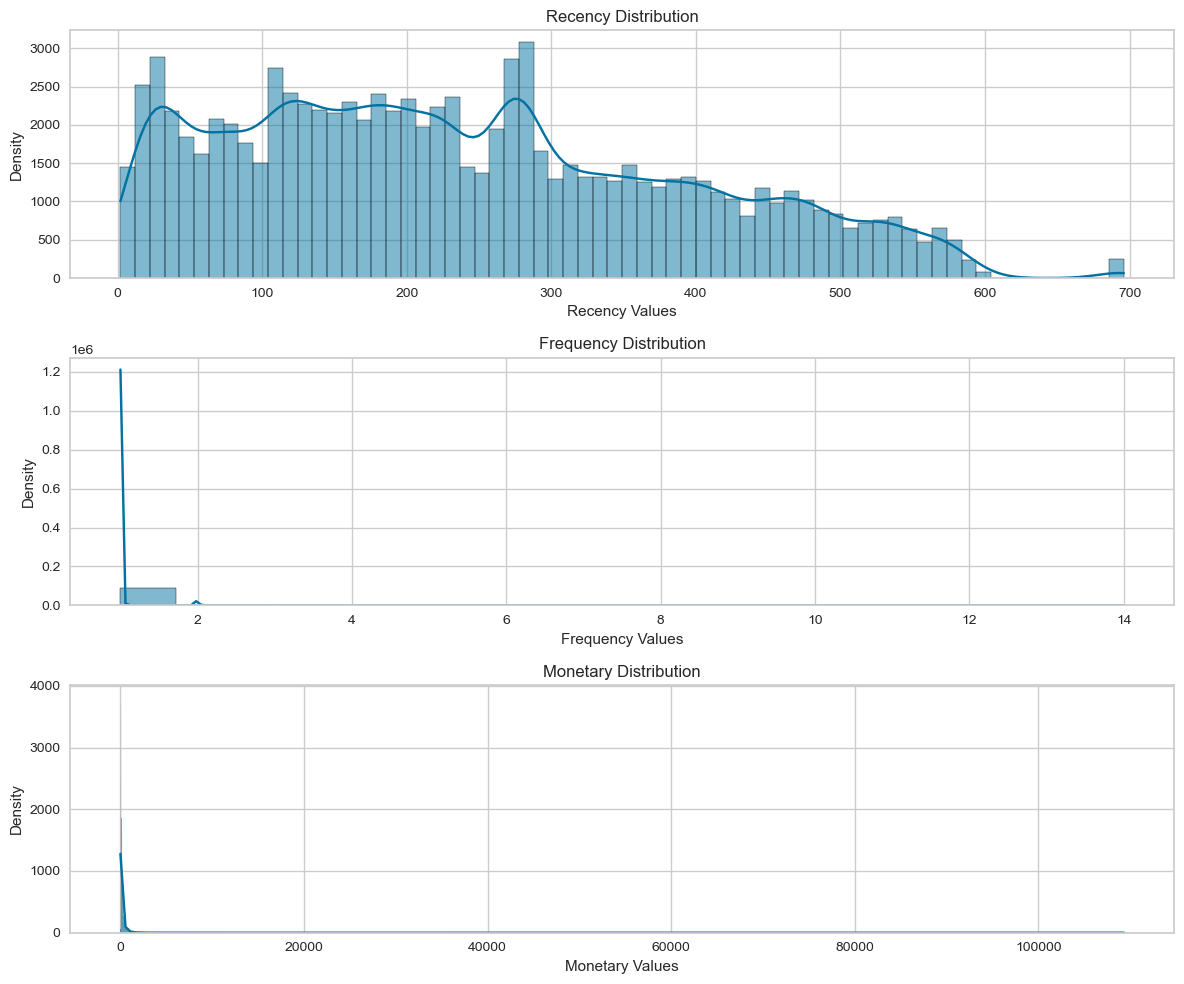

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
sns.histplot(rfm['recency'], kde=True)
plt.title('Recency Distribution')
plt.xlabel('Recency Values')
plt.ylabel('Density')
plt.subplot(3, 1, 2)
sns.histplot(rfm['frequency'], kde=True)
plt.title('Frequency Distribution')
plt.xlabel('Frequency Values')
plt.ylabel('Density')
plt.subplot(3, 1, 3)
sns.histplot(rfm['monetary'], kde=True)
plt.title('Monetary Distribution')
plt.xlabel('Monetary Values')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

- **Récence dispersée**
- **Fréquence concentrée**
- **Dépense faible**

In [11]:
# Export des données pour analyse RFM
rfm.to_csv('OLIST_data_RFM.csv')

In [12]:
# Lire le fichier CSV
rfm_data = pd.read_csv('OLIST_data_RFM.csv')

# Afficher les premières lignes pour vérifier
print(rfm_data.head())

                 customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19
2  0000f46a3911fa3c0805444483337064      538          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      289          1    196.89


In [13]:
# Ajout des  indicateurs RFM au dataframe de travail global
data = pd.merge(data, rfm, on='customer_unique_id')
data.shape

(112393, 31)

### <a name="C4"><span style='background:PowderBlue'>2.2 Les indicateurs de segmentation démographique</span>

- ***La segmentation démographique repose sur des caractéristiques des clients telles que l'âge, le sexe, la profession, le revenu, le niveau d'éducation, le statut marital, la taille et le poids.***
****
- ***Nous ne disposons d'aucune information pour créer des indicateurs démographiques.***

### <a name="C5"><span style='background:PowderBlue'>2.3 Les indicateurs de segmentation géographique</span>

- ***La segmentation géographique utilise le lieu de résidence des clients pour analyser leur distribution régionale.***
- ***Nous avons des données sur la ville, l'état, la latitude et la longitude des clients, mais pas sur leur lieu de travail. Nous calculerons la moyenne des latitudes et longitudes pour chaque client.***
*****
- ***Indicateur qui permet d'identifier les zones géographiques avec une forte concentration de clients.***

In [14]:
# regroupement par client
#Calcul des moyennes des coordonnées géographiques pour chaque client
data['geolocation_lat'] = data.groupby('customer_unique_id')['geolocation_lat'].transform('mean')
data['geolocation_lng'] = data.groupby('customer_unique_id')['geolocation_lng'].transform('mean')

# Conserver les 200 villes avec le plus de clients
top_200_villes = data['customer_city'].value_counts().head(200).index #compte le nombre de clients dans chaque ville
data.loc[~data['customer_city'].isin(top_200_villes), 'customer_city'] = 'Autre'
data.head(1)

,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,processing_time,order_item_id,product_id,shipping_limit_date,price,freight_value,annee_mois,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,has_comment,year_month,geolocation_lat,geolocation_lng,recency,frequency,monetary
customer_unique_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,1,credit_card,1,18.12,4,True,2017-10,-23.576983,-46.587161,333,2,82.82


### <a name="C6"><span style='background:PowderBlue'>2.4 Les indicateurs de segmentation comportementale </span>

- ***La segmentation comportementale analyse les habitudes des clients, comme la fréquence d'achat, les marques préférées, et la fidélité. Nous disposons de nombreuses données, notamment sur les achats, les prix payés, et les catégories de produits préférées.***

***<font color='Blue'>1. habitudes temporelles d'achats des clients***

- ***On se concentre  sur le calcul de la date du dernier achat pour chaque client, ce qui est souvent un bon indicateur des habitudes de consommation***

In [15]:
data['date_dernier_achat'] = data.groupby('customer_unique_id')['order_purchase_timestamp'].transform('max')

***<font color='Blue'>2. Calcul du nombre des commandes***

In [16]:
# Calculer le nombre de commandes pour chaque client
data['nbr_commandes'] = data.groupby('customer_unique_id')['order_id'].transform('count')

# Vérification des valeurs de fréquence
frequency_counts = data['nbr_commandes'].value_counts(normalize=True) * 100
print(frequency_counts)

# Calculer le pourcentage de clients avec une fréquence de commande différente de 1
percentage_diff_frequency = (data['nbr_commandes'] > 1).mean() * 100
print(f"Pourcentage de clients avec une fréquence différente de 1: {percentage_diff_frequency}%")

nbr_commandes
1     68.873506
2     17.917486
3      5.036791
4      3.124750
6      1.441371
5      1.374641
7      0.435970
8      0.284715
12     0.256244
10     0.204639
9      0.184175
11     0.156593
24     0.128122
14     0.112107
15     0.080076
75     0.066730
13     0.057833
21     0.056053
20     0.053384
38     0.033810
35     0.031141
26     0.023133
22     0.019574
19     0.016905
18     0.016015
16     0.014236
Name: proportion, dtype: float64
Pourcentage de clients avec une fréquence différente de 1: 31.126493642842522%


- ***Analyse des résultats :***
- 68.90% des clients ont passé une seule commande.
- 31.10% des clients ont passé plus d'une commande.

***<font color='Blue'>3. Nombre d'articles commandés***

In [17]:
# Calcul des articles
data['nbr_articles'] = data.groupby('customer_unique_id')['order_item_id'].transform('count')
# Nombre d'articles en moyenne par commande
data['nbr_articles_mean'] = data.groupby('customer_unique_id')['order_item_id'].transform('mean')

***<font color='Blue'>4. Moyen de paiement prefere***

In [18]:
# Réinitialiser l'index pour que 'customer_unique_id' devienne une colonne
data.reset_index(inplace=True)

# Calcul du moyen de paiement préféré
df_moy_paiement = data[['customer_unique_id', 'payment_type']].drop_duplicates().groupby('customer_unique_id')['payment_type'].first().reset_index()

# Renommer la colonne pour clarification
df_moy_paiement.rename(columns={'payment_type': 'moyen_paiement_prefere'}, inplace=True)

# Fusionner les résultats avec le DataFrame original
data = data.merge(df_moy_paiement, on='customer_unique_id', how='left')
data.head()

,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,processing_time,order_item_id,product_id,shipping_limit_date,price,freight_value,annee_mois,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,has_comment,year_month,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,1,credit_card,1,18.12,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,3,voucher,1,2.00,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,2,voucher,1,18.59,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card
3,7c396fd4830fd04220f754e42b4e5bff,69923a4e07ce446644394df37a710286,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,2017-09,1.0,1,9abb00920aae319ef9eba674b7d2e6ff,2017-09-11 11:43:25,35.39,8.72,2017-09,3149,sao paulo,SP,baby,1,credit_card,1,44.11,5,True,2017-09,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card
4,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,2017-08,2.0,1,87285b34884572647811a353c7ac498a,2017-08-21 20:05:16,29.99,7.78,2017-08,3366,sao paulo,SP,housewares,1,credit_card,3,37.77,4,True,2017-08,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card


***<font color='Blue'>5. Echéances de paiement***

In [19]:
# Calcul des échéances de paiement
data['echeance_paiement_mean'] = data.groupby('customer_unique_id')['payment_installments'].transform('mean')

***<font color='Blue'>6. Produit le plus acheté***

In [20]:
# Calcul de la catégorie de produit la plus achetée par client (ligne de code ajoutée ici)
data['cat_produit_prefere'] = data.groupby('customer_unique_id')['product_category_name_english'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.nan)
data['cat_produit_prefere']

0                    housewares
1                    housewares
2                    housewares
3                    housewares
4                    housewares
                  ...          
112388    arts_and_craftmanship
112389    arts_and_craftmanship
112390    arts_and_craftmanship
112391    security_and_services
112392    security_and_services
Name: cat_produit_prefere, Length: 112393, dtype: object

In [21]:
#Sélection des colonnes finales pour le clustering
cols_finales = [
    'customer_unique_id', 'nbr_commandes', 'nbr_articles', 'nbr_articles_mean', 
     'moyen_paiement_prefere', 'echeance_paiement_mean', 'cat_produit_prefere'
]

data_final = data[cols_finales].drop_duplicates(subset=['customer_unique_id']).reset_index(drop=True)

# Fusionner 'data' avec 'data_final' pour combiner les informations
data = data.merge(data_final, on='customer_unique_id', how='left')
data

,customer_unique_id,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year,processing_time,order_item_id,product_id,shipping_limit_date,price,freight_value,annee_mois,customer_zip_code_prefix,customer_city,customer_state,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score,has_comment,year_month,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes_x,nbr_articles_x,nbr_articles_mean_x,moyen_paiement_prefere_x,echeance_paiement_mean_x,cat_produit_prefere_x,nbr_commandes_y,nbr_articles_y,nbr_articles_mean_y,moyen_paiement_prefere_y,echeance_paiement_mean_y,cat_produit_prefere_y
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,1,credit_card,1,18.12,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares,4,4,1.0,credit_card,1.0,housewares
1,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,3,voucher,1,2.00,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares,4,4,1.0,credit_card,1.0,housewares
2,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10,8.0,1,87285b34884572647811a353c7ac498a,2017-10-06 11:07:15,29.99,8.72,2017-10,3149,sao paulo,SP,housewares,2,voucher,1,18.59,4,True,2017-10,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares,4,4,1.0,credit_card,1.0,housewares
3,7c396fd4830fd04220f754e42b4e5bff,69923a4e07ce446644394df37a710286,delivered,2017-09-04 11:26:38,2017-09-04 11:43:25,2017-09-04 21:22:15,2017-09-05 19:20:20,2017-09-15 00:00:00,2017-09,1.0,1,9abb00920aae319ef9eba674b7d2e6ff,2017-09-11 11:43:25,35.39,8.72,2017-09,3149,sao paulo,SP,baby,1,credit_card,1,44.11,5,True,2017-09,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares,4,4,1.0,credit_card,1.0,housewares
4,3a51803cc0d012c3b5dc8b7528cb05f7,128e10d95713541c87cd1a2e48201934,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,2017-08,2.0,1,87285b34884572647811a353c7ac498a,2017-08-21 20:05:16,29.99,7.78,2017-08,3366,sao paulo,SP,housewares,1,credit_card,3,37.77,4,True,2017-08,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card,3.0,housewares,1,1,1.0,credit_card,3.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112388,c887bc0b0717ee4a21d7d22137f12ee3,0b82d0616f1ad8da15cf967b984b4004,delivered,2018-08-03 21:35:53,2018-08-04 04:25:14,2018-08-08 14:26:00,2018-08-09 21:42:08,2018-08-10 00:00:00,2018-08,6.0,1,4a24717893a6c8f3cfcf9843b8987d15,2018-08-07 04:25:14,25.00,8.69,2018-08,30575,belo horizonte,MG,arts_and_craftmanship,1,boleto,1,33.69,5,False,2018-08,-19.973801,-43.972640,27,1,33.69,2018-08-03 21:35:53,1,1,1.0,boleto,1.0,arts_and_craftmanship,1,1,1.0,boleto,1.0,arts_and_craftmanship
112389,8d80e477643ec569b24592ce3d9dfc4c,2ef4a11b6e24fdfbb43b92cb5f95edff,delivered,2018-07-23 18:35:14,2018-07-24 10:31:25,2018-07-24 14:37:00,2018-07-27 14:04:10,2018-08-06 00:00:00,2018-07,3.0,1,9c313adb4b38a55b092f53f83f78be9e,2018-07-30 09:17:39,19.00,12.86,2018-07,9951,diadema,SP,arts

In [22]:
# Note :
# Après le feature engineering, les variables utilisées pour les jointures 
# ou celles ayant servi à créer de nouvelles variables ne sont plus nécessaires

# Liste des colonnes à supprimer
cols_a_supp = ['customer_zip_code_prefix', 'order_id', 'order_purchase_timestamp', 'order_approved_at',
               'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date',
               'review_score', 'order_item_id', 'product_id', 'shipping_limit_date', 'price', 'freight_value',
               'payment_sequential', 'payment_type', 'payment_installments', 'payment_value', 'product_category_name_english']

# Renommer les colonnes pour enlever les préfixes '_x' et '_y'
data.columns = [col.replace('_x', '').replace('_y', '') for col in data.columns]

# Supprimer les colonnes non nécessaires
data_cleaned = data.drop(columns=cols_a_supp)

# Afficher les colonnes restantes pour vérification
print("Colonnes après suppression :")
print(data_cleaned.columns)

# Identifier et supprimer les colonnes dupliquées
data_cleaned = data_cleaned.loc[:, ~data_cleaned.columns.duplicated()]

# Liste des colonnes  à conserver qui serviront pour la segmentation
cols_a_conserver = ['customer_unique_id', 'customer_city', 'customer_state', 'geolocation_lat', 
                    'geolocation_lng', 'recency', 'frequency', 'monetary', 'date_premier_achat', 
                    'premier_achat_jour', 'date_dernier_achat', 'nbr_commandes', 'nbr_articles', 
                    'nbr_articles_mean', 'panier_moyen', 'montant_bas', 'montant_haut', 
                    'moyen_paiement_prefere', 'echeance_paiement_mean', 'frais_port_mean', 
                    'cat_produit_prefere']

# Vérifier si les colonnes nécessaires sont dans le dataframe nettoyé
missing_cols = [col for col in cols_a_conserver if col not in data_cleaned.columns]
print("Colonnes manquantes :", missing_cols)

# Supprimer les colonnes manquantes de la liste à conserver
cols_a_conserver = [col for col in cols_a_conserver if col in data_cleaned.columns]

# Sélection des colonnes nécessaires pour la segmentation
df_final = data_cleaned[cols_a_conserver]

# Supprimer les lignes dupliquées
df_final = df_final.drop_duplicates()

# Vérifier le nombre de doublons après la suppression
print("Nombre de doublons après suppression :", df_final.duplicated().sum())

Colonnes après suppression :
Index(['customer_unique_id', 'order_status', 'monthear', 'processing_time', 'annee_mois', 'customer_city', 'customer_state', 'has_comment', 'year_month', 'geolocation_lat', 'geolocation_lng', 'recency', 'frequency', 'monetary', 'date_dernier_achat', 'nbr_commandes', 'nbr_articles', 'nbr_articles_mean', 'moyen_paiement_prefere', 'echeance_paiement_mean', 'cat_produit_prefere', 'nbr_commandes', 'nbr_articles', 'nbr_articles_mean', 'moyen_paiement_prefere', 'echeance_paiement_mean', 'cat_produit_prefere'], dtype='object')
Colonnes manquantes : ['date_premier_achat', 'premier_achat_jour', 'panier_moyen', 'montant_bas', 'montant_haut', 'frais_port_mean']
Nombre de doublons après suppression : 0


In [23]:
df_final

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere,echeance_paiement_mean,cat_produit_prefere
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares
4,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card,3.0,housewares
5,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,-23.600462,-46.655318,393,1,37.77,2017-08-02 18:24:47,1,1,1.0,credit_card,1.0,housewares
6,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,-27.528367,-48.491914,311,1,44.09,2017-10-23 23:26:46,1,1,1.0,boleto,1.0,housewares
7,3e4fd73f1e86b135b9b121d6abbe9597,Autre,SP,-21.874288,-51.844970,279,1,356.12,2017-11-24 21:27:48,1,1,1.0,credit_card,10.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,4637328fb3cc446c747c7f83f80c651d,uberlandia,MG,-18.891616,-48.289816,130,1,34.22,2018-04-22 20:15:52,1,1,1.0,credit_card,1.0,arts_and_craftmanship
112388,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,-19.973801,-43.972640,27,1,33.69,2018-08-03 21:35:53,1,1,1.0,boleto,1.0,arts_and_craftmanship
112389,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,-23.689006,-46.590933,38,1,169.26,2018-07-23 18:35:14,2,2,1.5,credit_card,1.0,arts_and_craftmanship
112391,d8bee9ec375c3a0f9ef8ed7456a51dcd,Autre,RO,-11.722454,-61.777036,582,1,209.06,2017-01-26 11:09:00,1,1,1.0,credit_card,1.0,security_and_services


In [24]:
df_final['frequency'].value_counts(normalize=True) * 100

frequency
1     96.933895
2      2.822572
3      0.193071
4      0.031813
5      0.009873
7      0.003291
6      0.003291
9      0.001097
14     0.001097
Name: proportion, dtype: float64

In [25]:
# Copie du dataframe de travail
data_client = df_final.copy()
# Filtre sur les variable à conserver
data_client = data_client[cols_a_conserver]
data_client.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere,echeance_paiement_mean,cat_produit_prefere
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares
4,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card,3.0,housewares
5,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,-23.600462,-46.655318,393,1,37.77,2017-08-02 18:24:47,1,1,1.0,credit_card,1.0,housewares
6,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,-27.528367,-48.491914,311,1,44.09,2017-10-23 23:26:46,1,1,1.0,boleto,1.0,housewares
7,3e4fd73f1e86b135b9b121d6abbe9597,Autre,SP,-21.874288,-51.844970,279,1,356.12,2017-11-24 21:27:48,1,1,1.0,credit_card,10.0,housewares


In [26]:
data_client.columns.tolist()

['customer_unique_id',
 'customer_city',
 'customer_state',
 'geolocation_lat',
 'geolocation_lng',
 'recency',
 'frequency',
 'monetary',
 'date_dernier_achat',
 'nbr_commandes',
 'nbr_articles',
 'nbr_articles_mean',
 'moyen_paiement_prefere',
 'echeance_paiement_mean',
 'cat_produit_prefere']

# <a name="C7"><font color='RoyalBlue'> 3. Segmentation RFM</a>

- <font color='Blue'>**Mission**
*****
- Fournir aux équipes Marketing de l'entreprise Olist (site de e-commerce) une segmentation des clients utilisables dans leurs campagnes de communication.
*****
- <font color='Blue'>**Objectifs**
*****
- **Comprendre les différents types d'utilisateurs :** Analyser les comportements et les données personnelles des clients pour identifier les différents segments.
- **Fournir une description actionnable de la segmentation :** Proposer une segmentation basée sur des critères logiques et optimisés, facilitant la mise en place de campagnes marketing efficaces.
- **Proposer un contrat de maintenance :** Analyser la stabilité des segments au fil du temps et proposer une fréquence de mise à jour de la segmentation pour garantir sa pertinence.

- ***Qu'est-ce que la Segmentation RFM ?***

- La segmentation RFM est une méthode utilisée pour diviser les clients en groupes basés sur leur comportement d'achat. Cela aide les marketeurs à envoyer des messages plus pertinents à chaque groupe.

- **Pourquoi Utiliser la Segmentation RFM ?**
- La segmentation RFM permet de cibler les clients selon leur comportement d'achat. Par exemple, un client qui a acheté récemment, fréquemment, et a dépensé beaucoup est plus susceptible d'acheter à nouveau.
****
- **Principe:**
- La segmentation RFM repose sur trois critères comportementaux :

- Récence (R): Date du dernier achat ou contact client.
- Fréquence (F): Nombre d’achats sur une période donnée.
- Montant (M): Somme totale des achats sur cette période.

### <a name="C12"><span style='background:PowderBlue'>3.2 Segmentation RFM - K-Means</span>

***Nous allons utiliser l'algorithme de K-Means pour segmenter nos clients en différents groupes.***

- **Étapes de segmentation des clients avec K-Means:**
*****
- **Préparation des données :** Sélectionner et normaliser les variables RFM (Récence, Fréquence, Monétaire).
- **Application de K-Means :** Déterminer le nombre optimal de clusters (K) et appliquer l'algorithme K-Means.
- **Interprétation des résultats :** Analyser les segments de clients obtenus et leur signification.

### <a name="C13"><span style='background-color:#E6E6FA'>3.2.1  Préparation des données</span>

In [27]:
rfm.head()

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89


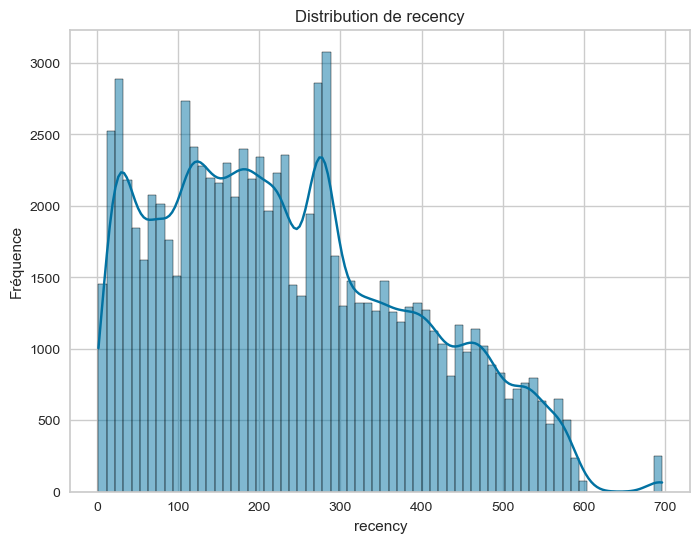

Asymétrie de recency: 0.4501800479679346, Test d'asymétrie: SkewtestResult(statistic=52.98036628270819, pvalue=0.0)


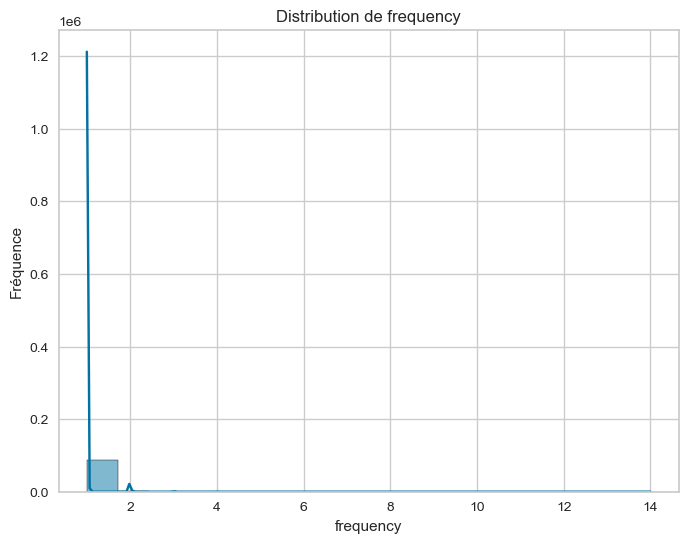

Asymétrie de frequency: 10.666556193238048, Test d'asymétrie: SkewtestResult(statistic=328.4138512166134, pvalue=0.0)


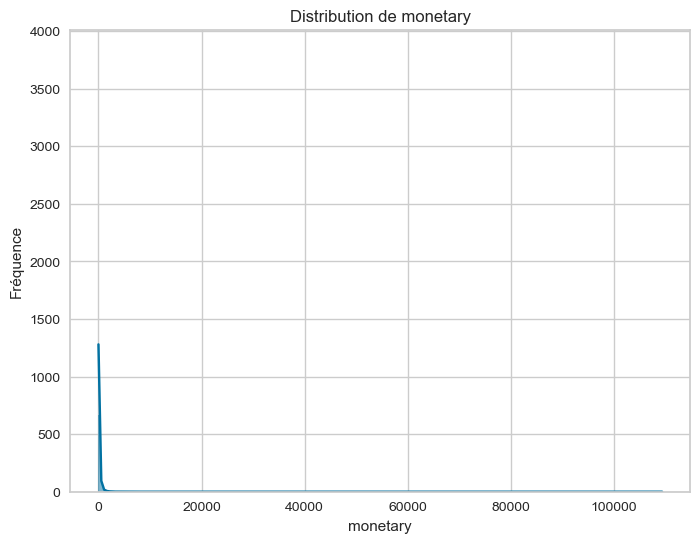

Asymétrie de monetary: 72.27140638712858, Test d'asymétrie: SkewtestResult(statistic=520.762448280384, pvalue=0.0)


In [28]:
import scipy.stats as stats

# Définition de la fonction de vérification de l'asymétrie
def verifier_asymetrie(df, colonne):
    asymetrie = stats.skew(df[colonne].dropna())  # Ignorer les valeurs NA
    test_asymetrie = stats.skewtest(df[colonne].dropna())
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[colonne].dropna(), kde=True)  # Ignorer les valeurs NA
    plt.title('Distribution de ' + colonne)
    plt.xlabel(colonne)
    plt.ylabel('Fréquence')
    plt.show()
    
    print("Asymétrie de {}: {}, Test d'asymétrie: {}".format(colonne, asymetrie, test_asymetrie))
    return

# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = data.select_dtypes(include=[np.number]).columns

# Vérification de l'asymétrie pour toutes les colonnes numériques
for col in rfm:
    verifier_asymetrie(rfm, col)

**Recency Distribution:** La distribution de la récence montre que la plupart des clients ont effectué un achat récemment, avec une légère asymétrie positive (0.45), indiquant une légère tendance vers des valeurs plus élevées de récence.

**Frequency Distribution:** La distribution de la fréquence des achats est fortement asymétrique (10.67), ce qui indique que la plupart des clients n'ont effectué qu'un seul achat, avec très peu de clients ayant effectué plusieurs achats.

**Monetary Distribution:** La distribution des valeurs monétaires est également fortement asymétrique (72.27), montrant que la majorité des clients ont dépensé des montants relativement faibles, avec quelques clients ayant des dépenses exceptionnellement élevées.

- <font color='Blue'>***Nous appliquons la transformation logarithmique pour les colonnes Fréquence et Montant***

In [29]:
rfm_log = rfm.copy()
rfm_log

,recency,frequency,monetary
customer_unique_id,,,
0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
0000f46a3911fa3c0805444483337064,538,1,86.22
0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,448,1,4134.84
fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
ffff371b4d645b6ecea244b27531430a,569,1,112.46


In [30]:
#Appliquer la transformation logarithmique en base 10 (log10) aux colonnes frequency et monetary de DataFrame rfm_log
for i in rfm_log.columns[1:]:
    rfm_log[i] = np.log10(rfm_log[i])

In [31]:
# Normaliser les variables RFM
scaler = StandardScaler()
rfm_log_scaled = rfm_log[['recency', 'frequency', 'monetary']]

rfm_normalisé = scaler.fit_transform(rfm_log_scaled)

# Afficher les premières lignes des données normalisées
rfm_normalisé[:5]

array([[-0.82235408, -0.17108582,  0.16885484],
       [-0.80268804, -0.17108582, -1.63581242],
       [ 1.96366761, -0.17108582, -0.37531788],
       [ 0.54771306, -0.17108582, -1.11955052],
       [ 0.33138667, -0.17108582,  0.52658581]])

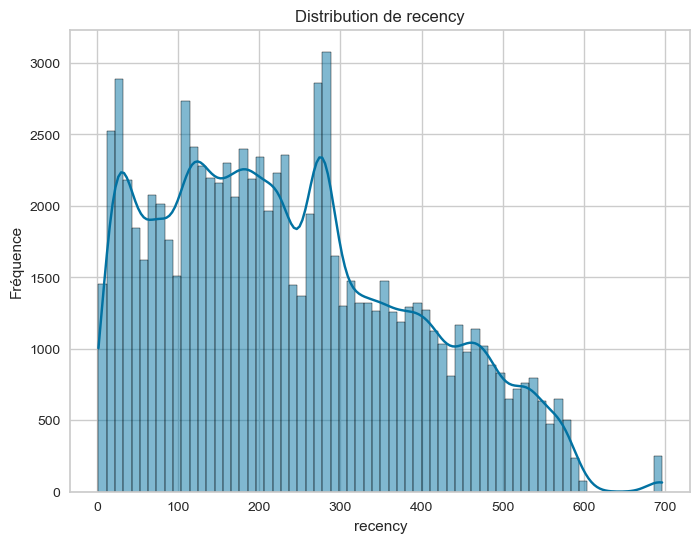

Asymétrie de recency: 0.4501800479679346, Test d'asymétrie: SkewtestResult(statistic=52.98036628270819, pvalue=0.0)


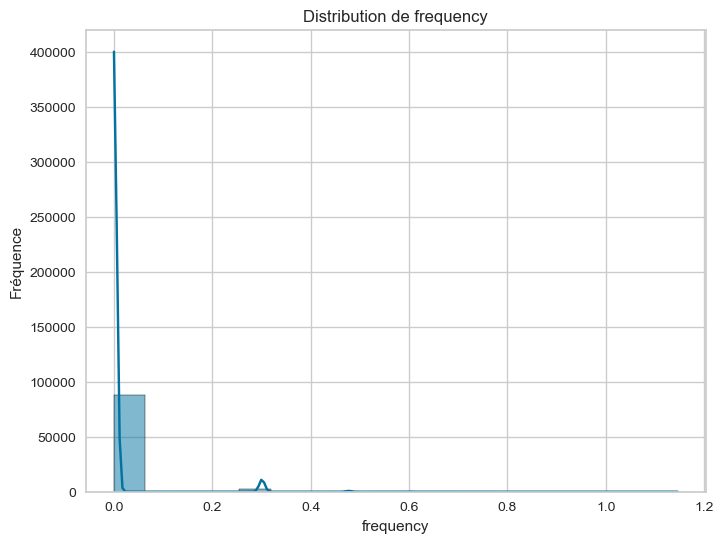

Asymétrie de frequency: 6.118394929086118, Test d'asymétrie: SkewtestResult(statistic=272.79323125185715, pvalue=0.0)


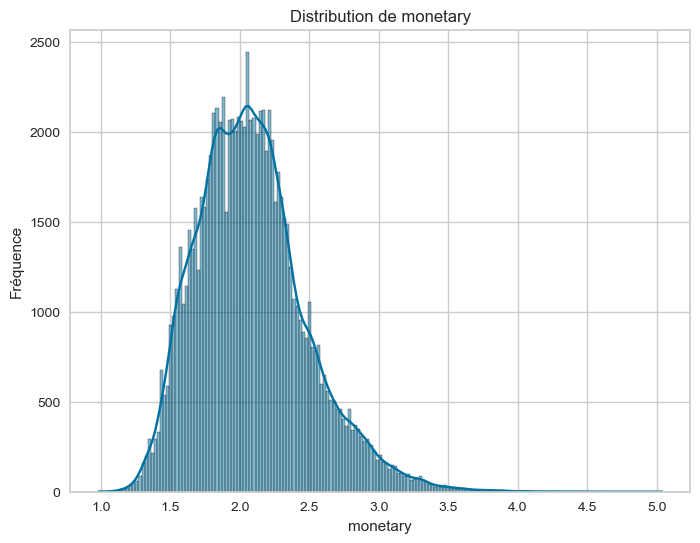

Asymétrie de monetary: 0.7271431836263612, Test d'asymétrie: SkewtestResult(statistic=80.66200644338842, pvalue=0.0)


In [32]:
for col in rfm_log.columns:
    verifier_asymetrie(rfm_log, col)

In [33]:
# Normaliser les variables RFM
scaler = StandardScaler()
rfm_normalisé = scaler.fit_transform(rfm_log[['recency', 'frequency', 'monetary']])

# Convertir le tableau normalisé en DataFrame pour une manipulation facile
rfm_log_scaled_df = pd.DataFrame(rfm_normalisé, columns=['recency', 'frequency', 'monetary'])

### <a name="C14"><span style='background-color:#E6E6FA'>3.2.2 Déterminer le nombre optimal de clusters</span>

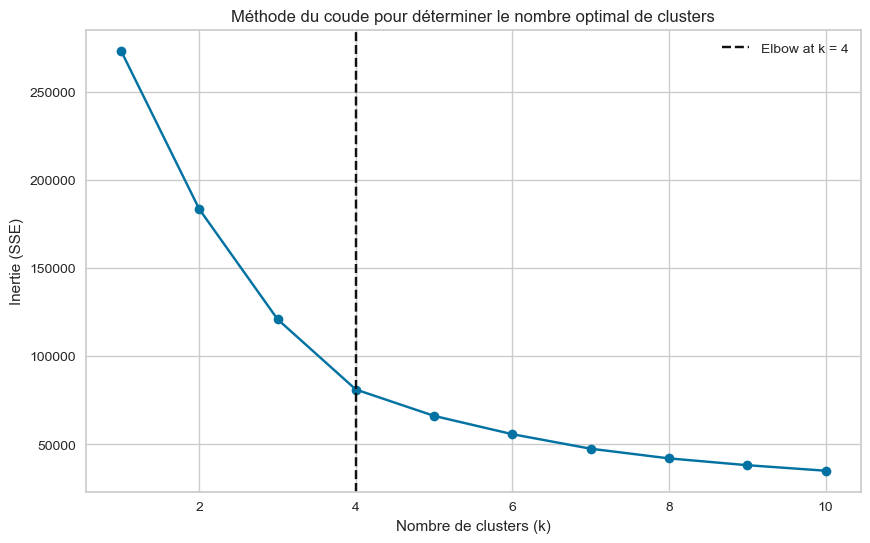

In [34]:
# Utiliser la méthode du coude pour déterminer le nombre optimal de clusters
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(rfm_normalisé)
    sse.append(kmeans.inertia_)

# Tracer la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertie (SSE)')
plt.title('Méthode du coude pour déterminer le nombre optimal de clusters')
plt.grid(True)

# Ajouter une ligne pour le "coude" identifié
optimal_k = 4  # par exemple, si on détermine que k=4 est optimal
plt.axvline(x=optimal_k, linestyle='--', color='k', label=f'Elbow at k = {optimal_k}')
plt.legend()
plt.show()

- ***La valeur du meilleur hyperparamètre k est '4'.***
****
- **StandardScaler** est utilisé pour normaliser les données, ce qui est important pour K-Means car il utilise la distance euclidienne.
- KMeans de Scikit-Learn est appliqué pour différents nombres de clusters (de 1 à 10) pour calculer l'inertie (SSE) pour chaque k.
- La méthode du coude est visualisée en traçant l'inertie en fonction du nombre de clusters et en identifiant visuellement le point où la diminution de l'inertie devient moins prononcée (le "coude").
- Une ligne verticale est ajoutée pour indiquer le nombre optimal de clusters déterminé visuellement (ici, k=4 est utilisé comme exemple).

### <a name="C15"><span style='background-color:#E6E6FA'>3.2.3 Application de K-Means</span>

In [35]:
# Appliquer K-Means avec le nombre optimal de clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
rfm_log_scaled_df['Cluster'] = kmeans.fit_predict(rfm_normalisé)

# Afficher les premières lignes du DataFrame avec les clusters
rfm_log_scaled_df.head()

,recency,frequency,monetary,Cluster
0,-0.822354,-0.171086,0.168855,0
1,-0.802688,-0.171086,-1.635812,0
2,1.963668,-0.171086,-0.375318,1
3,0.547713,-0.171086,-1.119551,1
4,0.331387,-0.171086,0.526586,3


In [36]:
# Nombre optimal de clusters
num_clusters = 4

# Appliquer K-Means
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
labels = kmeans.fit_predict(rfm_log_scaled_df[['recency', 'frequency', 'monetary']])

# Calcul des scores
silhouette_avg = silhouette_score(rfm_log_scaled_df[['recency', 'frequency', 'monetary']], labels)
calinski_harabasz = calinski_harabasz_score(rfm_log_scaled_df[['recency', 'frequency', 'monetary']], labels)
davies_bouldin = davies_bouldin_score(rfm_log_scaled_df[['recency', 'frequency', 'monetary']], labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Calinski-Harabasz Score: {calinski_harabasz}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.3773321786440329
Calinski-Harabasz Score: 71867.13920817178
Davies-Bouldin Index: 0.7749438769011205


- ***Silhouette Score (0.377) :*** Indique une cohésion modérée des clusters.
- ***Calinski-Harabasz Score (71867.14) :*** Suggère une bonne séparation entre les clusters.
- ***Davies-Bouldin Index (0.775) :*** Révèle une bonne séparation entre les clusters (plus faible est mieux).
****
<font color='Blue'>***Les scores indiquent une qualité de clustering modérée avec le K-means, suggérant des clusters distincts mais pas parfaitement séparés.***

### <a name="C14"><span style='background-color:#E6E6FA'>Caractérisation des clusters</span>

                                  recency  frequency  monetary  Cluster
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2      113          1    141.90        1
0000b849f77a49e4a4ce2b2a4ca5be3f      116          1     27.19        1
0000f46a3911fa3c0805444483337064      538          1     86.22        0
0000f6ccb0745a6a4b88665a16c9f078      322          1     43.62        0
0004aac84e0df4da2b147fca70cf8255      289          1    196.89        0


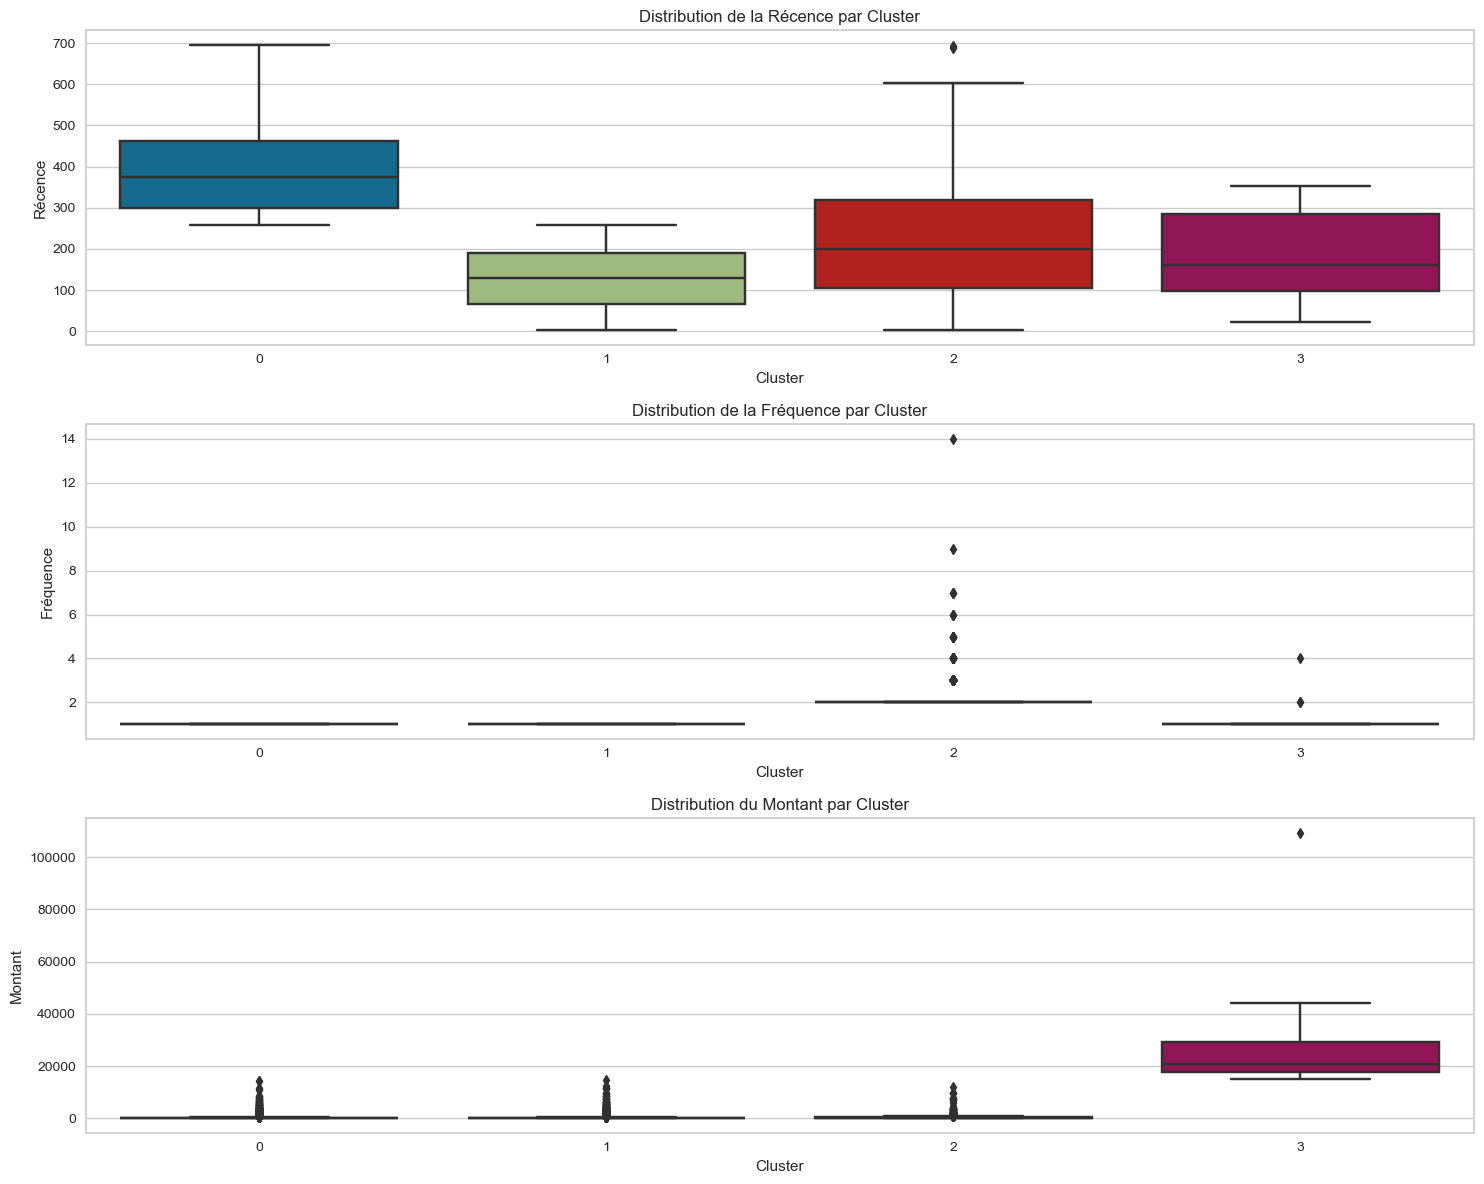

In [37]:
# Réduire et normaliser les données 
# Normaliser les données RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])

# Définir le nombre optimal de clusters 
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
rfm['Cluster'] = kmeans_best.fit_predict(rfm_normalized)

# Afficher les premières lignes du DataFrame avec les clusters
print(rfm.head())

# Renommer les colonnes pour une meilleure lisibilité
rfm.columns = ['Récence', 'Fréquence', 'Montant', 'Cluster']

# Initialiser la figure
plt.figure(figsize=(15, 12))

# Boxplot pour la Récence
plt.subplot(3, 1, 1)
sns.boxplot(x='Cluster', y='Récence', data=rfm)
plt.title('Distribution de la Récence par Cluster')

# Boxplot pour la Fréquence
plt.subplot(3, 1, 2)
sns.boxplot(x='Cluster', y='Fréquence', data=rfm)
plt.title('Distribution de la Fréquence par Cluster')

# Boxplot pour le Montant
plt.subplot(3, 1, 3)
sns.boxplot(x='Cluster', y='Montant', data=rfm)
plt.title('Distribution du Montant par Cluster')

# Afficher les plots
plt.tight_layout()
plt.show()

- **Les graphiques montrent la distribution de la récence, de la fréquence et du montant par cluster, ce qui permet de caractériser chaque segment de clients.**
****
- **Graphique 1 : Distribution de la Récence par Cluster**
- Cluster 0 : Ce cluster a une récence plus élevée, ce qui signifie que ces clients ont effectué des achats plus récemment.
*****
- **Graphique 2 : Distribution de la Fréquence par Cluster**
- Cluster 0 : La fréquence d'achat est faible, généralement autour de 1.
*****
- **Graphique 3 : Distribution du Montant par Cluster**
- Cluster 3 :les clients du Cluster 3 ont un montant d'achat beaucoup plus élevé, indiquant un panier moyen plus élevé.

In [38]:
# Dictionnaire pour mapper les clusters aux segments de clients
cluster_names = {
    0: 'Nouveaux clients',
    1: 'Champions',
    2: 'Loyaux',
    3: 'Clients perdus'
}

# Ajouter une colonne avec les noms des clusters
rfm_log_scaled_df['Segment'] = rfm_log_scaled_df['Cluster'].map(cluster_names)

# Afficher les premières lignes du DataFrame
rfm_log_scaled_df.head()

,recency,frequency,monetary,Cluster,Segment
0,-0.822354,-0.171086,0.168855,0,Nouveaux clients
1,-0.802688,-0.171086,-1.635812,0,Nouveaux clients
2,1.963668,-0.171086,-0.375318,1,Champions
3,0.547713,-0.171086,-1.119551,1,Champions
4,0.331387,-0.171086,0.526586,3,Clients perdus


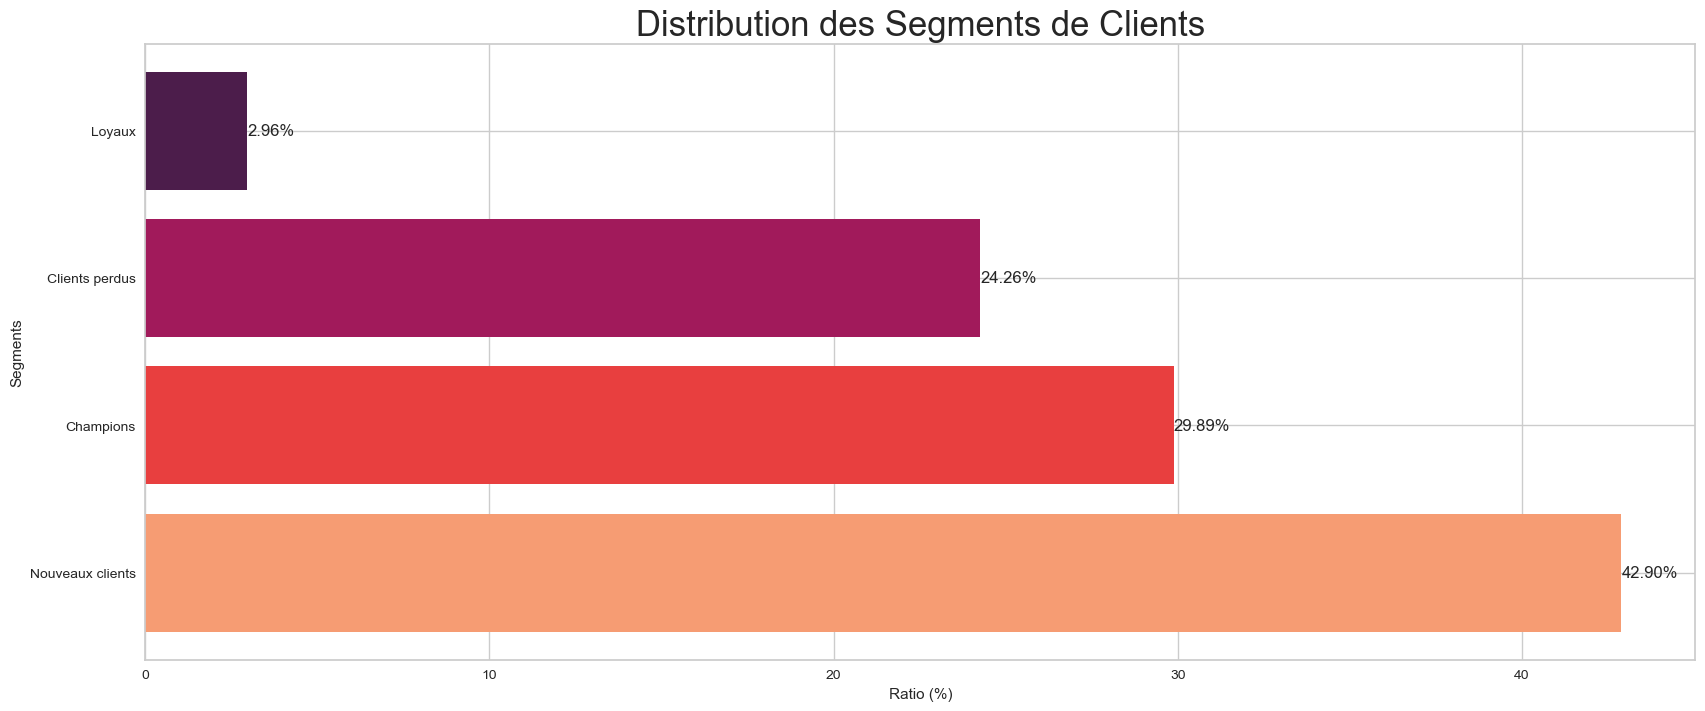

In [39]:
# Calculer les proportions de chaque segment
segment_counts = rfm_log_scaled_df['Segment'].value_counts(normalize=True) * 100
ratios = segment_counts.values
segments = segment_counts.index

# Palette de couleurs
palette = sns.color_palette("rocket_r", len(ratios))

# Créer le graphique
plt.figure(figsize=(20, 8))
plt.barh(range(len(ratios)), ratios, color=palette)
plt.xlabel('Ratio (%)')
plt.ylabel('Segments')
plt.yticks(range(len(ratios)), segments)
plt.title('Distribution des Segments de Clients', fontsize=25)

# Ajouter les annotations de texte
for i, ratio in enumerate(ratios):
    plt.text(ratio, i, f'{ratio:.2f}%', va='center', ha='left')

# Afficher le graphique
plt.show()

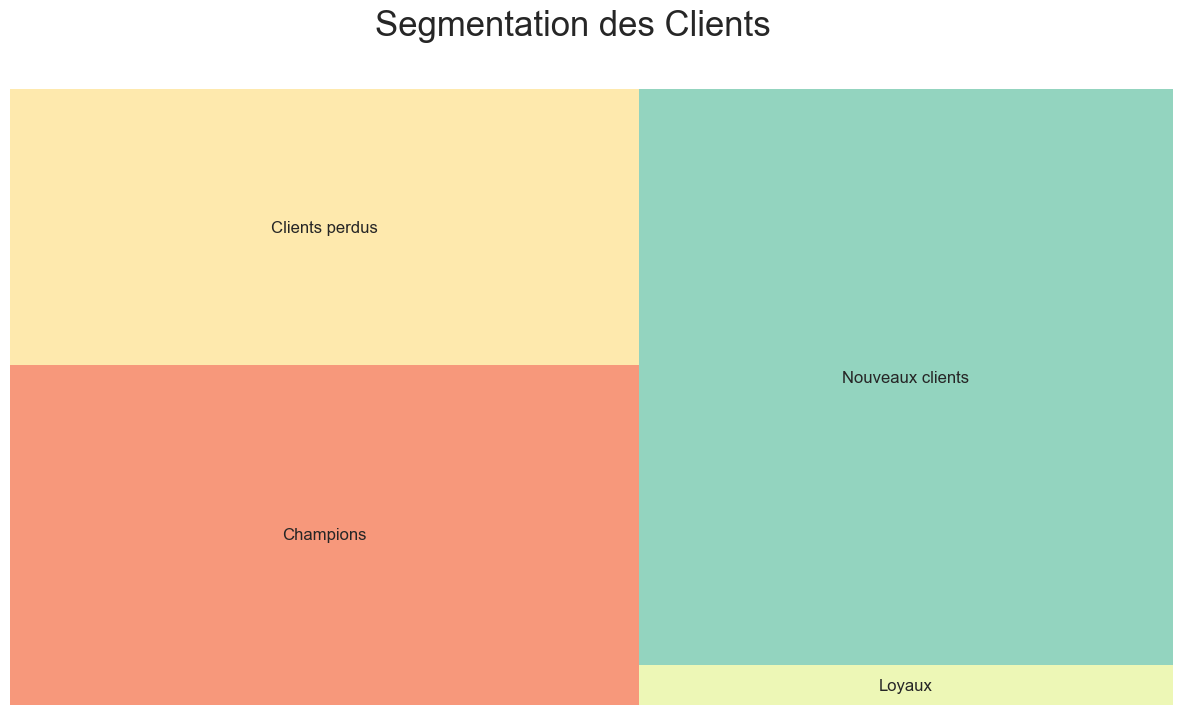

In [40]:
import squarify
# Calculer les statistiques nécessaires pour chaque segment
rfm_stats2 = rfm_log_scaled_df.groupby('Segment').agg({
    'recency': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
    'Cluster': 'count'
}).rename(columns={'Cluster': 'count'})

# Palette de couleurs pour le graphique
colors = sns.color_palette("Spectral", n_colors=len(rfm_stats2))

# Créer un graphique Treemap
plt.figure(figsize=(15, 8))
squarify.plot(sizes=rfm_stats2["count"], label=rfm_stats2.index, 
              color=colors, alpha=0.7)
plt.suptitle("Segmentation des Clients", fontsize=25)
plt.axis('off')
plt.show()

- **Analyse des Segments de Clients**
****
- Le graphique des segments de clients montre la distribution des différents types de clients :

- Nouveaux clients (42.90%)
- Champions (29.89%)
- Clients perdus (24.26%)
- Loyaux (2.96%)

# <a name="C16"><font color='RoyalBlue'> 4. Segmentation des clients</a>

### <a name="C17"><span style='background:PowderBlue'>Transformation logarithmique </span>

In [41]:
rfm_log = data_client.copy()
rfm_log

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere,echeance_paiement_mean,cat_produit_prefere
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares
4,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card,3.0,housewares
5,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,-23.600462,-46.655318,393,1,37.77,2017-08-02 18:24:47,1,1,1.0,credit_card,1.0,housewares
6,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,-27.528367,-48.491914,311,1,44.09,2017-10-23 23:26:46,1,1,1.0,boleto,1.0,housewares
7,3e4fd73f1e86b135b9b121d6abbe9597,Autre,SP,-21.874288,-51.844970,279,1,356.12,2017-11-24 21:27:48,1,1,1.0,credit_card,10.0,housewares
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112387,4637328fb3cc446c747c7f83f80c651d,uberlandia,MG,-18.891616,-48.289816,130,1,34.22,2018-04-22 20:15:52,1,1,1.0,credit_card,1.0,arts_and_craftmanship
112388,c887bc0b0717ee4a21d7d22137f12ee3,belo horizonte,MG,-19.973801,-43.972640,27,1,33.69,2018-08-03 21:35:53,1,1,1.0,boleto,1.0,arts_and_craftmanship
112389,8d80e477643ec569b24592ce3d9dfc4c,diadema,SP,-23.689006,-46.590933,38,1,169.26,2018-07-23 18:35:14,2,2,1.5,credit_card,1.0,arts_and_craftmanship
112391,d8bee9ec375c3a0f9ef8ed7456a51dcd,Autre,RO,-11.722454,-61.777036,582,1,209.06,2017-01-26 11:09:00,1,1,1.0,credit_card,1.0,security_and_services


In [42]:
# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = data_client.select_dtypes(include=[np.number]).columns

# Appliquer la transformation logarithmique sur chaque colonne numérique
# Ajouter 1 pour éviter les problèmes avec les valeurs zéro
for col in colonnes_numeriques:
    rfm_log[col] = np.log1p(rfm_log[col])

rfm_log.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere,echeance_paiement_mean,cat_produit_prefere
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,NaN,NaN,5.811141,1.098612,4.428672,2017-10-02 10:56:33,1.609438,1.609438,0.693147,credit_card,0.693147,housewares
4,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,NaN,NaN,5.942799,0.693147,3.657647,2017-08-15 18:29:31,0.693147,0.693147,0.693147,credit_card,1.386294,housewares
5,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,NaN,NaN,5.976351,0.693147,3.657647,2017-08-02 18:24:47,0.693147,0.693147,0.693147,credit_card,0.693147,housewares
6,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,NaN,NaN,5.743003,0.693147,3.808660,2017-10-23 23:26:46,0.693147,0.693147,0.693147,boleto,0.693147,housewares
7,3e4fd73f1e86b135b9b121d6abbe9597,Autre,SP,NaN,NaN,5.634790,0.693147,5.878072,2017-11-24 21:27:48,0.693147,0.693147,0.693147,credit_card,2.397895,housewares


### <a name="C17"><span style='background:PowderBlue'>4.1 Standardisation des variables quantitatives</span>

In [43]:
# Copie du DataFrame original
rfm_log = data_client.copy()

# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = rfm_log.select_dtypes(include=[np.number]).columns.tolist()

# Standardisation des données
scaler = StandardScaler()
rfm_log_scaled = scaler.fit_transform(rfm_log[colonnes_numeriques])

# Création d'un DataFrame pour les données normalisées
rfm_log_scaled_df = pd.DataFrame(rfm_log_scaled, columns=colonnes_numeriques, index=rfm_log.index)

# Ajouter les colonnes non numériques à rfm_log_scaled_df
colonnes_non_numeriques = rfm_log.select_dtypes(exclude=[np.number]).columns.tolist()
rfm_log_scaled_df = pd.concat([rfm_log_scaled_df, rfm_log[colonnes_non_numeriques]], axis=1)

# Afficher les premières lignes du DataFrame normalisé
rfm_log_scaled_df.head()


,geolocation_lat,geolocation_lng,recency,frequency,monetary,nbr_commandes,nbr_articles,nbr_articles_mean,echeance_paiement_mean,customer_unique_id,customer_city,customer_state,date_dernier_achat,moyen_paiement_prefere,cat_produit_prefere
0,-0.425101,-0.098374,0.620183,4.615749,-0.205298,3.305709,3.305709,-0.266033,-0.710117,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,2017-10-02 10:56:33,credit_card,housewares
4,-0.422899,-0.085336,0.928309,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,0.036114,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,2017-08-15 18:29:31,credit_card,housewares
5,-0.429286,-0.115174,1.013535,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,-0.710117,ef0996a1a279c26e7ecbd737be23d235,sao paulo,SP,2017-08-02 18:24:47,credit_card,housewares
6,-1.129434,-0.567875,0.475955,-0.162602,-0.266824,-0.282164,-0.282164,-0.266033,-0.710117,e781fdcc107d13d865fc7698711cc572,florianopolis,SC,2017-10-23 23:26:46,boleto,housewares
7,-0.121596,-1.394368,0.266167,-0.162602,0.228866,-0.282164,-0.282164,-0.266033,2.647922,3e4fd73f1e86b135b9b121d6abbe9597,Autre,SP,2017-11-24 21:27:48,credit_card,housewares


### <a name="C18"><span style='background:PowderBlue'>4.2 Encodage des Variables Catégorielles</span>

In [44]:
# Encodage des variables catégorielles avec get_dummies
df_encoded = pd.get_dummies(data_client[['moyen_paiement_prefere', 'cat_produit_prefere']], drop_first=True)

# Fusion des données standardisées avec les variables catégorielles encodées
df_final = pd.concat([data_client, df_encoded], axis=1)

In [45]:
pd.options.display.max_columns=100
df_final.head()

,customer_unique_id,customer_city,customer_state,geolocation_lat,geolocation_lng,recency,frequency,monetary,date_dernier_achat,nbr_commandes,nbr_articles,nbr_articles_mean,moyen_paiement_prefere,echeance_paiement_mean,cat_produit_prefere,moyen_paiement_prefere_credit_card,moyen_paiement_prefere_debit_card,moyen_paiement_prefere_voucher,cat_produit_prefere_air_conditioning,cat_produit_prefere_art,cat_produit_prefere_arts_and_craftmanship,cat_produit_prefere_audio,cat_produit_prefere_auto,cat_produit_prefere_baby,cat_produit_prefere_bed_bath_table,cat_produit_prefere_books_general_interest,cat_produit_prefere_books_imported,cat_produit_prefere_books_technical,cat_produit_prefere_cds_dvds_musicals,cat_produit_prefere_christmas_supplies,cat_produit_prefere_cine_photo,cat_produit_prefere_computers,cat_produit_prefere_computers_accessories,cat_produit_prefere_consoles_games,cat_produit_prefere_construction_tools_construction,cat_produit_prefere_construction_tools_lights,cat_produit_prefere_construction_tools_safety,cat_produit_prefere_cool_stuff,cat_produit_prefere_costruction_tools_garden,cat_produit_prefere_costruction_tools_tools,cat_produit_prefere_diapers_and_hygiene,cat_produit_prefere_drinks,cat_produit_prefere_dvds_blu_ray,cat_produit_prefere_electronics,cat_produit_prefere_fashio_female_clothing,cat_produit_prefere_fashion_bags_accessories,cat_produit_prefere_fashion_childrens_clothes,cat_produit_prefere_fashion_male_clothing,cat_produit_prefere_fashion_shoes,cat_produit_prefere_fashion_sport,cat_produit_prefere_fashion_underwear_beach,cat_produit_prefere_fixed_telephony,cat_produit_prefere_flowers,cat_produit_prefere_food,cat_produit_prefere_food_drink,cat_produit_prefere_furniture_bedroom,cat_produit_prefere_furniture_decor,cat_produit_prefere_furniture_living_room,cat_produit_prefere_furniture_mattress_and_upholstery,cat_produit_prefere_garden_tools,cat_produit_prefere_health_beauty,cat_produit_prefere_home_appliances,cat_produit_prefere_home_appliances_2,cat_produit_prefere_home_comfort_2,cat_produit_prefere_home_confort,cat_produit_prefere_home_construction,cat_produit_prefere_housewares,cat_produit_prefere_industry_commerce_and_business,cat_produit_prefere_kitchen_dining_laundry_garden_furniture,cat_produit_prefere_la_cuisine,cat_produit_prefere_luggage_accessories,cat_produit_prefere_market_place,cat_produit_prefere_music,cat_produit_prefere_musical_instruments,cat_produit_prefere_office_furniture,cat_produit_prefere_party_supplies,cat_produit_prefere_perfumery,cat_produit_prefere_pet_shop,cat_produit_prefere_security_and_services,cat_produit_prefere_signaling_and_security,cat_produit_prefere_small_appliances,cat_produit_prefere_small_appliances_home_oven_and_coffee,cat_produit_prefere_sports_leisure,cat_produit_prefere_stationery,cat_produit_prefere_tablets_printing_image,cat_produit_prefere_telephony,cat_produit_prefere_toys,cat_produit_prefere_watches_gifts
0,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,-23.576983,-46.587161,333,2,82.82,2017-10-02 10:56:33,4,4,1.0,credit_card,1.0,housewares,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,3a51803cc0d012c3b5dc8b7528cb05f7,sao paulo,SP,-23.564630,-46.534268,380,1,37.77,2017-08-15 18:29:31,1,1,1.0,credit_card,3.0,housewares,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,Fal

### <a name="C19"><span style='background:PowderBlue'>4.3 Clustering de partitionnement sur tous les clients</span>

### <a name="C20"><span style='background-color:#E6E6FA'>4.3.1 K-means</span>

<font color='RoyalBlue'>***Note sur la Méthode de Clustering K-means***

- La méthode k-means est idéale pour **segmenter les clients en groupes homogènes**, en minimisant la SSE pour une meilleure qualité des clusters. **Les hyperparamètres permettent de contrôler l'initialisation, la reproductibilité, et la convergence de l'algorithme.**
- L'utilisateur spécifie le nombre de clusters (k).
- n_clusters : Nombre de clusters désiré, déterminé souvent par la méthode du coude.

- ***Pour évaluer la qualité d'un clustering, nous utilisons principalement trois métriques :***
****
<font color='RoyalBlue'>**Score de Silhouette :** 
- Mesure à quel point un objet est similaire à son propre cluster par rapport aux autres clusters. Des valeurs plus élevées indiquent des clusters mieux définis.
- ***Le score de silhouette varie entre -1 et 1. Un score élevé (proche de 1) indique que les objets sont bien groupés au sein de leurs clusters respectifs et bien séparés des autres clusters. Un score proche de 0 indique que les objets sont sur la frontière entre deux clusters. Un score négatif suggère que les objets pourraient être mal assignés.***
****
- ***Utilisation : Si la majorité des objets ont des scores de silhouette élevés, cela indique une bonne configuration de clustering.***
****
<font color='RoyalBlue'>**Indice de Calinski-Harabasz :**
- Ratio de la somme de la dispersion inter-clusters et de la dispersion intra-cluster. Des valeurs plus élevées indiquent des clusters mieux définis.
****
<font color='RoyalBlue'>**Indice de Davies-Bouldin :**
-  io de la somme des distances intra-cluster aux distances inter-clusters. Des valeurs plus faibles indiquent des clusters mieux définis.
- Mesure à quel point un objet est bien associé à son propre cluster (cohésion) par rapport aux autres clusters (séparation)
- ***Cette métrique évalue la qualité du clustering en calculant la moyenne des ratios de la dispersion intra-cluster à la séparation inter-cluster.***
- ***Un score plus bas est préférable, indiquant que les clusters sont compacts et bien distincts les uns des autres.***
****
- ***Un indice de Davies-Bouldin plus faible reflète des clusters bien séparés et bien groupés, tandis qu'un score élevé indique des clusters qui se chevauchent et qui sont étendus.***

<font color='RoyalBlue'>**Explication des Métriques :**
****
- **Score de Silhouette :** Mesure à quel point un objet est similaire à son propre cluster par rapport aux autres clusters. Des valeurs plus élevées indiquent des clusters mieux définis.
- **Indice de Calinski-Harabasz :** Ratio de la somme de la dispersion inter-clusters et de la dispersion intra-cluster. Des valeurs plus élevées indiquent des clusters mieux définis.
- **Indice de Davies-Bouldin :** Ratio de la somme des distances intra-cluster aux distances inter-clusters. Des valeurs plus faibles indiquent des clusters mieux définis.
****
- **Silhouette :** Score élevé = bon clustering.
- **Indice de Calinski-Harabasz :** Score élevé = bon clustering.
- **Davies-Bouldin :** Score bas = bon clustering.

<font color='RoyalBlue'>**Méthode Elbow**

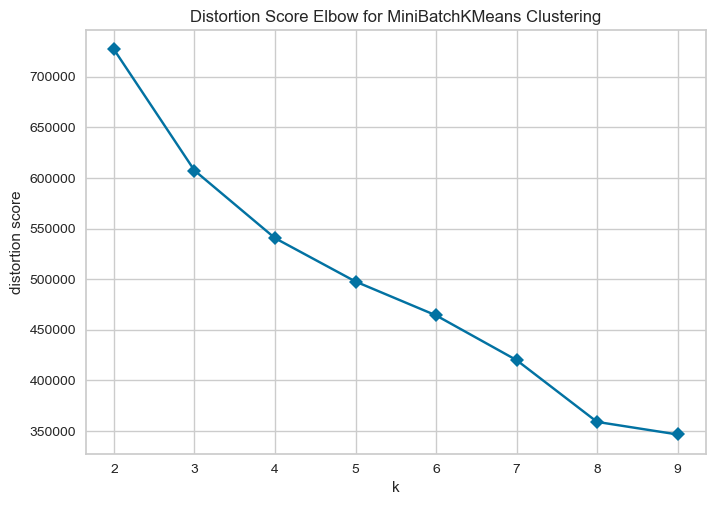

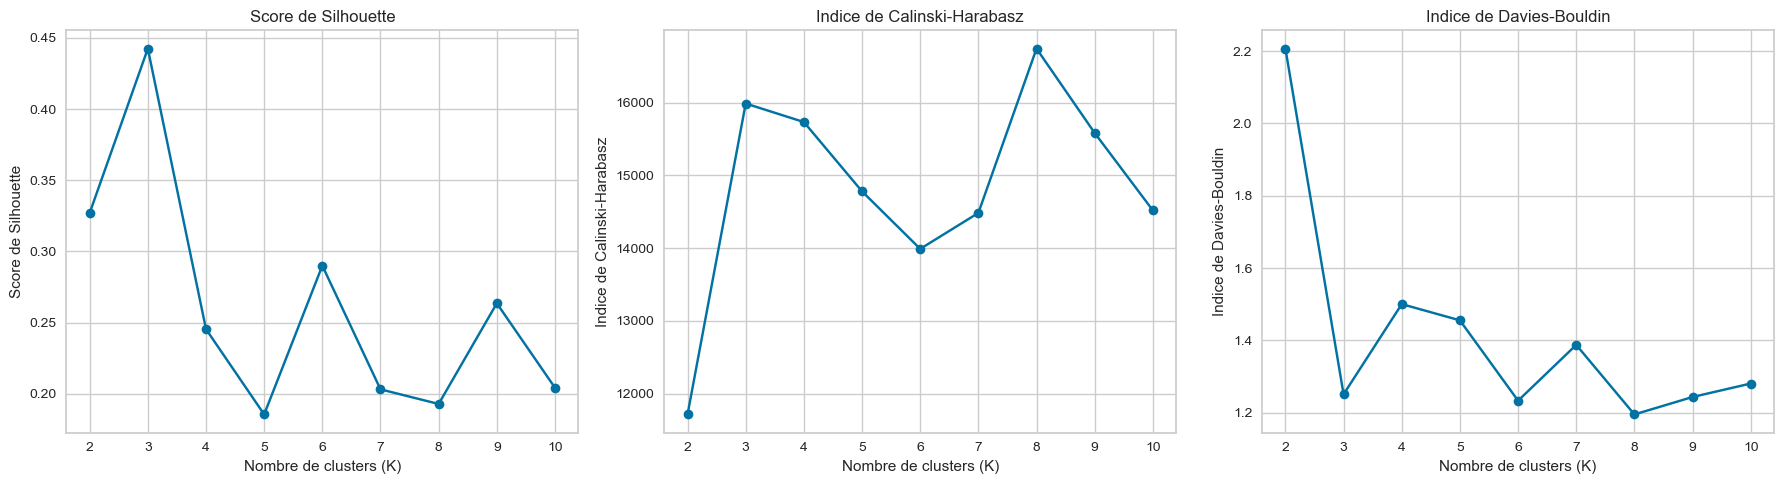

In [46]:
# Définir la graine pour la reproductibilité
seed = 42

# Standardisation des données
scaler = StandardScaler()
rfm_log_scaled = scaler.fit_transform(rfm_log.select_dtypes(include=[np.number]))

# Création d'un DataFrame pour les données normalisées
rfm_log_scaled_df = pd.DataFrame(rfm_log_scaled, columns=rfm_log.select_dtypes(include=[np.number]).columns, index=rfm_log.index)

# Méthode Elbow avec KMeans optimisé (MiniBatchKMeans)
model = MiniBatchKMeans(random_state=seed, batch_size=1024)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=False)
visualizer.fit(rfm_log_scaled_df)
visualizer.show()

# Fonction pour calculer les scores pour une valeur de K
def compute_scores(k):
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=seed, batch_size=1024)
    labels = kmeans.fit_predict(rfm_log_scaled_df)
    silhouette = silhouette_score(rfm_log_scaled_df, labels)
    calinski_harabasz = calinski_harabasz_score(rfm_log_scaled_df, labels)
    davies_bouldin = davies_bouldin_score(rfm_log_scaled_df, labels)
    return silhouette, calinski_harabasz, davies_bouldin

# Calcul des scores de Silhouette, Calinski-Harabasz, et Davies-Bouldin en parallèle
results = Parallel(n_jobs=-1)(delayed(compute_scores)(k) for k in range(2, 11))

silhouette_scores, calinski_harabasz_scores, davies_bouldin_scores = zip(*results)

# Tracer les scores de Silhouette, Calinski-Harabasz et Davies-Bouldin
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de Silhouette')
plt.title('Score de Silhouette')

plt.subplot(1, 3, 2)
plt.plot(range(2, 11), calinski_harabasz_scores, 'bo-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Indice de Calinski-Harabasz')
plt.title('Indice de Calinski-Harabasz')

plt.subplot(1, 3, 3)
plt.plot(range(2, 11), davies_bouldin_scores, 'bo-')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Indice de Davies-Bouldin')
plt.title('Indice de Davies-Bouldin')

plt.tight_layout()
plt.show()


<font color='RoyalBlue'>***Interprétation des Résultats***
****
- Elbow Method suggère K=4 ou k =5 comme le nombre optimal de clusters.
- Silhouette Score suggère K=5 comme le nombre optimal avec le score le plus élevé.
- Calinski-Harabasz Index indique également un pic à K=3.
- Davies-Bouldin Index est le plus bas pour K=3, suggérant des clusters bien séparés.
****
<font color='RoyalBlue'>***Recommandation :***
****
- ***Les différentes méthodes donnent des suggestions légèrement différentes :***

- K=5 semble très fort basé sur silhouette score.
- K=4 est également une bonne option basé sur la méthode Elbow , indice de Davies-Bouldin et l'indice de Calinski-Harabasz.

- ***Pour une décision finale nous décidons de privilégier une structure bien équilibrée et denses, K=4 est une très bonne option.***

In [47]:
# Instancier le modèle KMeans avec le meilleur K (par exemple, K=4)
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=seed)
kmeans_best.fit(rfm_log_scaled_df)

KMeans(n_clusters=4, random_state=42)

<font color='RoyalBlue'>**Evaluation des clusters**

In [48]:
# Prédiction des Clusters avec Entraînement sur toutes les données
predictions = kmeans_best.fit_predict(rfm_log_scaled_df)

# Calcul des métriques de validation des clusters
score_kmeans_s = silhouette_score(rfm_log_scaled_df, kmeans_best.labels_, metric='euclidean')
score_kmeans_c = calinski_harabasz_score(rfm_log_scaled_df, kmeans_best.labels_)
score_kmeans_d = davies_bouldin_score(rfm_log_scaled_df, predictions)

# Affichage des résultats
print('Silhouette Score: %.4f' % score_kmeans_s)
print('Calinski Harabasz Score: %.4f' % score_kmeans_c)
print('Davies Bouldin Score: %.4f' % score_kmeans_d)

Silhouette Score: 0.3798
Calinski Harabasz Score: 16741.4224
Davies Bouldin Score: 1.2313


- **Silhouette Score (0.3798) :** Les clusters sont faiblement cohésifs, ce qui signifie que les points ne sont pas très bien regroupés au sein de chaque cluster.
- **Calinski Harabasz Score (16741.4224) :** Les clusters sont bien séparés et compacts.
- **Davies Bouldin Score ( 1.2313) :** Les clusters sont modérément bien séparés et compacts, un score plus proche de 0 étant meilleur.
****
<font color='RoyalBlue'>***Interprétation Générale***
- ***Les clusters sont modérément bien séparés et compacts, mais avec une faible cohésion interne.***

<font color='RoyalBlue'>***1. Ajout des Labels de Clusters au DataFrame Original***

In [49]:
# Ajouter les labels de clusters au DataFrame original
df_clusters = pd.DataFrame(rfm_log_scaled_df, columns=rfm_log_scaled_df.columns)
df_clusters['Cluster'] = kmeans_best.labels_
df_clusters.head()

,geolocation_lat,geolocation_lng,recency,frequency,monetary,nbr_commandes,nbr_articles,nbr_articles_mean,echeance_paiement_mean,Cluster
0,-0.425101,-0.098374,0.620183,4.615749,-0.205298,3.305709,3.305709,-0.266033,-0.710117,1
4,-0.422899,-0.085336,0.928309,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,0.036114,0
5,-0.429286,-0.115174,1.013535,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,-0.710117,0
6,-1.129434,-0.567875,0.475955,-0.162602,-0.266824,-0.282164,-0.282164,-0.266033,-0.710117,0
7,-0.121596,-1.394368,0.266167,-0.162602,0.228866,-0.282164,-0.282164,-0.266033,2.647922,0


In [50]:
# Identifier le meilleur cluster en termes de fréquence (nombre de clients)
best_cluster = df_clusters['Cluster'].value_counts().idxmax()
print(f"Le meilleur cluster (le plus grand nombre de clients) est : Cluster {best_cluster}")

Le meilleur cluster (le plus grand nombre de clients) est : Cluster 0


In [51]:
# Dictionnaire de remplacement des labels de clusters
replacement_dict = {
    0: 'Clients Potentiels à Réactiver',
    1: 'Clients Réguliers avec Crédits',
    2: 'Clients Très Satisfaits et Loyaux',
    3: 'Clients VIP Actifs'
}

# Remplacer les labels des clusters dans df_clusters
df_clusters['Cluster'] = df_clusters['Cluster'].replace(replacement_dict)
df_clusters.head()

,geolocation_lat,geolocation_lng,recency,frequency,monetary,nbr_commandes,nbr_articles,nbr_articles_mean,echeance_paiement_mean,Cluster
0,-0.425101,-0.098374,0.620183,4.615749,-0.205298,3.305709,3.305709,-0.266033,-0.710117,Clients Réguliers avec Crédits
4,-0.422899,-0.085336,0.928309,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,0.036114,Clients Potentiels à Réactiver
5,-0.429286,-0.115174,1.013535,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,-0.710117,Clients Potentiels à Réactiver
6,-1.129434,-0.567875,0.475955,-0.162602,-0.266824,-0.282164,-0.282164,-0.266033,-0.710117,Clients Potentiels à Réactiver
7,-0.121596,-1.394368,0.266167,-0.162602,0.228866,-0.282164,-0.282164,-0.266033,2.647922,Clients Potentiels à Réactiver


<font color='RoyalBlue'>***3. Affichage de la distribution des clusters***

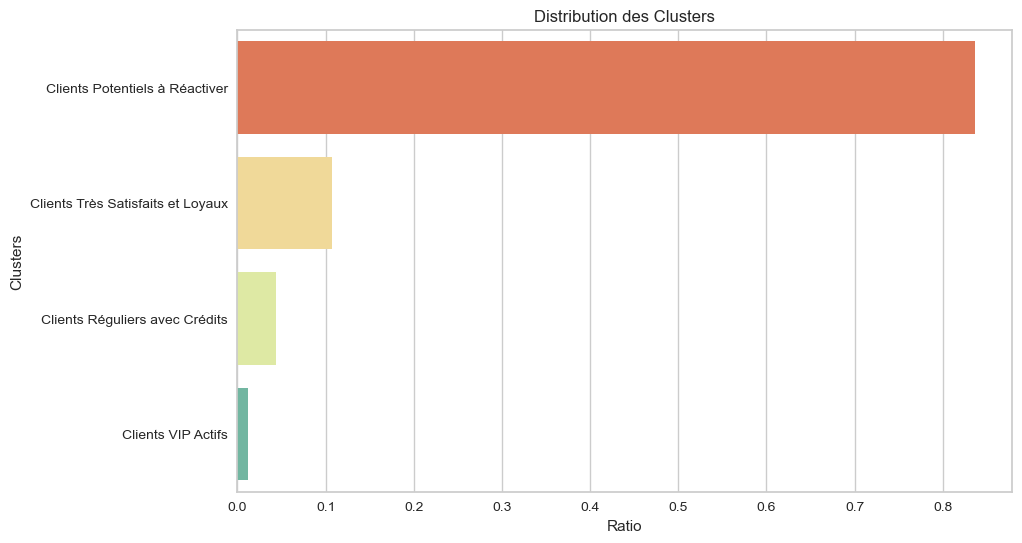

In [52]:
# Calculer les ratios de chaque cluster
cluster_counts = df_clusters['Cluster'].value_counts(normalize=True)
cluster_counts = cluster_counts.reset_index()
cluster_counts.columns = ['Cluster', 'Ratio']

# Définir les couleurs
palette = sns.color_palette("Spectral", n_colors=len(cluster_counts))

# Tracer un graphique en barres horizontales
plt.figure(figsize=(10, 6))
sns.barplot(x='Ratio', y='Cluster', data=cluster_counts, palette=palette)
plt.xlabel('Ratio')
plt.ylabel('Clusters')
plt.title('Distribution des Clusters')
plt.show()

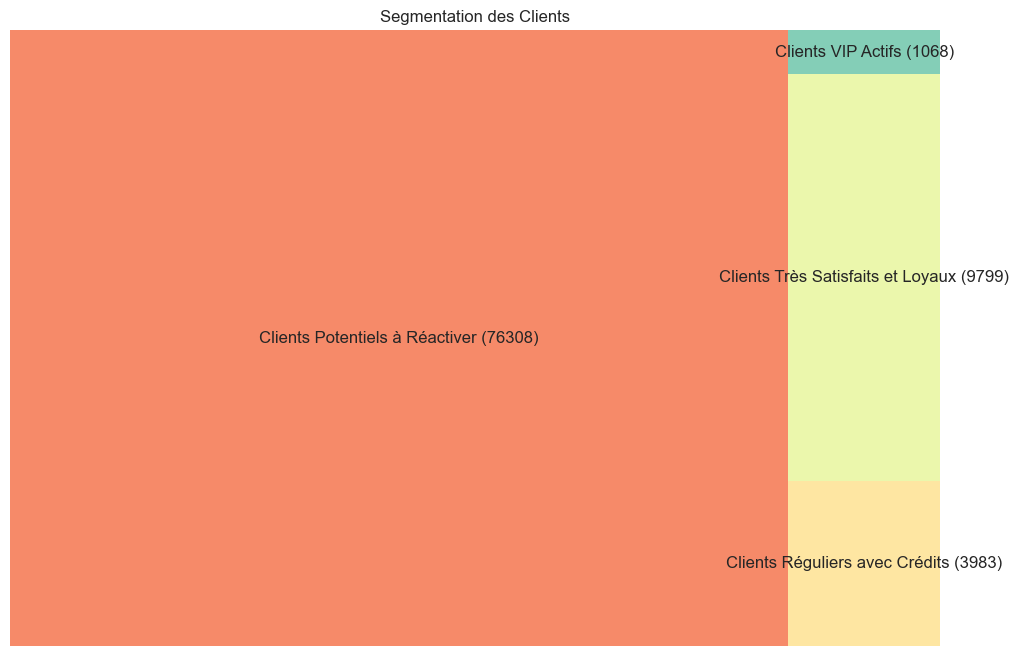

In [53]:
import squarify
# Préparer les données pour le treemap
cluster_sizes = df_clusters['Cluster'].value_counts().sort_index()
labels = [f"{cluster} ({size})" for cluster, size in zip(cluster_sizes.index, cluster_sizes.values)]

# Définir les couleurs
colors = sns.color_palette("Spectral", len(cluster_sizes))

# Tracer le treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=cluster_sizes.values, label=labels, color=colors, alpha=0.8)
plt.axis('off')
plt.title("Segmentation des Clients")
plt.show()

### <a name="C21"><span style='background-color:#E6E6FA'>4.3.2 Réduction de dimensions : ACP</span>

<font color='RoyalBlue'>***Utilisation de l'ACP :***

- ***L'ACP permet de réduire la dimensionnalité des données tout en conservant l'essentiel de l'information.***
- ***Cela peut simplifier les modèles de segmentation et réduire le risque de surapprentissage (overfitting).***
- ***Recommandé si les données initiales sont très nombreuses ou fortement corrélées.***

<font color='RoyalBlue'>***Nous allons réaliser une Analyse en Composantes Principales (ACP) afin de déterminer s'il est possible de catégoriser nos clients en utilisant moins de variables tout en maintenant une variance expliquée cumulée de 95%.*** 
****
<font color='RoyalBlue'>***L'objectif de cette analyse est de réduire la dimensionnalité de nos données tout en conservant les informations les plus significatives, ce qui facilitera un processus de segmentation des clients plus efficace.***

In [54]:
# Copie du DataFrame
df_acp = data_client.copy()

In [55]:
# Sélection des colonnes numériques
colonnes_numeriques = list(df_acp.select_dtypes(include=['int64', 'float64', 'uint8']).columns)

# Normalisation des données
scaler = StandardScaler()
preprocessor = ColumnTransformer([
    ('scaler', scaler, colonnes_numeriques)])

# Pipeline pour normalisation et ACP
pca_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(svd_solver='full'))
])

# Ajuster le pipeline aux données
pca_pipeline.fit(df_acp)

# Transformer les données avec l'ACP
X_projected = pca_pipeline.transform(df_acp)

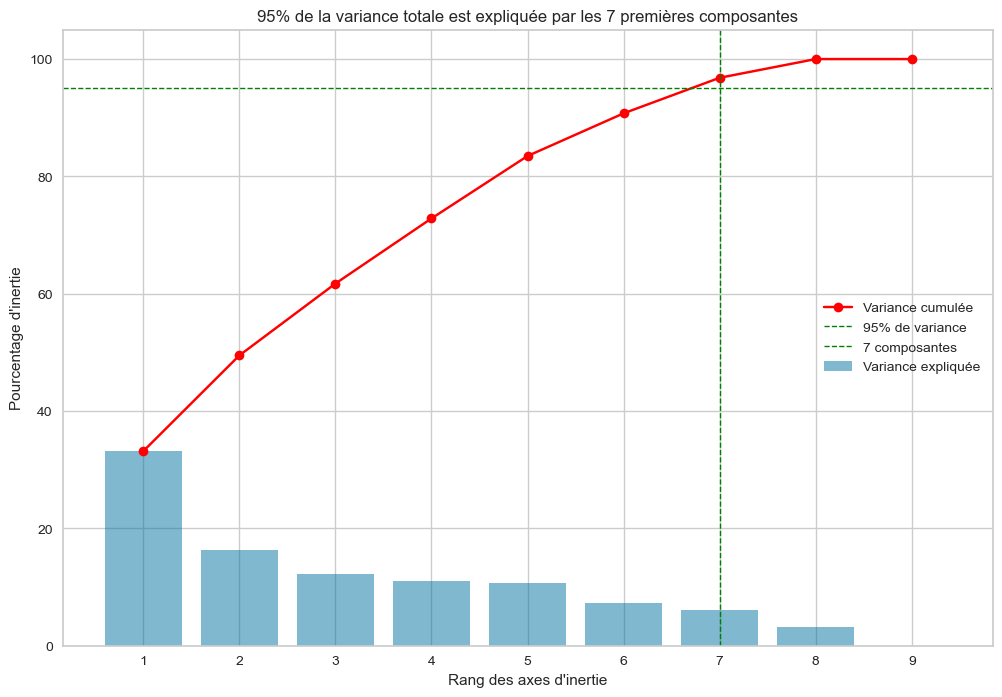

Pour expliquer 95% de la variance, il faut 7 composantes principales.
        CP1       CP2       CP3       CP4       CP5       CP6       CP7
0  4.456696 -0.713409 -3.630858 -2.925927  1.156270  0.288301  0.144628
1 -0.562191 -0.297853  0.370258 -0.787427 -0.382514 -0.055753  0.266349
2 -0.603383 -0.451188 -0.032338 -0.717251 -0.940806  0.189569  0.240409
3 -0.590292 -1.281421 -0.065934 -0.316148 -0.617254  0.144501  0.399645
4 -0.238151 -0.522762  2.064455 -0.691889  1.838564 -0.458775 -0.809168


In [56]:
# Variance expliquée par chaque composante
variance_expliquee = pca_pipeline.named_steps['pca'].explained_variance_ratio_ * 100

# Tracer la variance cumulée
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(variance_expliquee)) + 1, variance_expliquee, alpha=0.5, align='center', label='Variance expliquée')
cumsum_variance = variance_expliquee.cumsum()
plt.plot(np.arange(len(variance_expliquee)) + 1, cumsum_variance, c="red", marker='o', label='Variance cumulée')

# Marquer la ligne des 95% de variance
plt.axhline(y=95, color='green', linestyle='--', linewidth=1, label='95% de variance')
nombre_composantes = np.argmax(cumsum_variance >= 95) + 1
plt.axvline(x=nombre_composantes, color='green', linestyle='--', linewidth=1, label=f'{nombre_composantes} composantes')

# Ajouter des étiquettes et le titre
plt.xlabel("Rang des axes d'inertie")
plt.xticks(np.arange(len(variance_expliquee)) + 1)
plt.ylabel("Pourcentage d'inertie")
plt.title(f"{95}% de la variance totale est expliquée par les {nombre_composantes} premières composantes")
plt.legend(loc='best')

plt.show()

# Afficher le nombre minimal de composantes nécessaires
print(f"Pour expliquer 95% de la variance, il faut {nombre_composantes} composantes principales.")

# Créer un DataFrame avec les composantes principales
colonnes_composantes = [f'CP{i+1}' for i in range(nombre_composantes)]
df_acp_result = pd.DataFrame(data=X_projected[:, :nombre_composantes], columns=colonnes_composantes)

# Afficher les premières lignes du DataFrame ACP
print(df_acp_result.head())

- ***Bien que l'Analyse en Composantes Principales (ACP) montre que 95% de la variance peut être expliquée par 8 composantes principales, nous avons décidé de ne pas l'utiliser pour la segmentation des clients.***
- ***Les caractéristiques initiales sont gérables et leur utilisation directe facilite l'interprétation des résultats.***
- ***Par conséquent, la segmentation sera effectuée sans réduction de dimensionnalité pour conserver la clarté et la traçabilité des caractéristiques originales.***

### <a name="C22"><span style='background-color:#E6E6FA'>4.3.3 DBSCAN</span>

- ***L'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) est une technique de clustering polyvalente, reconnue pour sa capacité à identifier des clusters de formes et de tailles variées en se basant sur la densité des données.***
****
- ***Contrairement aux méthodes traditionnelles, DBSCAN ne nécessite pas de spécifier à l'avance le nombre de clusters, ce qui le rend particulièrement utile pour les ensembles de données avec des nombres de clusters inconnus ou variables.***

- ***Utiliser l'algorithme DBSCAN (Density-Based Spatial Clustering of Applications with Noise) spécifiquement sur les données RFM (Récence, Fréquence, Montant) plutôt que sur la totalité des données clients pour plusieurs raisons :***
****
- **Représentation concise et pertinente :** Les données RFM synthétisent de manière efficace le comportement d'achat des clients. Elles capturent les informations essentielles nécessaires à la segmentation, réduisant ainsi le bruit potentiellement présent dans les autres données non RFM.

- **Performance de l'algorithme :** DBSCAN peut être sensible à la **dimensionnalité des données.** Travailler avec un ensemble de données réduit et pertinent, comme les données RFM, améliore la performance et l'efficacité de l'algorithme.

- **Simplicité et interprétabilité :** Les résultats de la segmentation RFM sont généralement plus simples à interpréter et à utiliser pour les équipes marketing, car ils se basent sur des concepts commerciaux bien compris (récence, fréquence, montant).

### <a name="C23"><font color='RoyalBlue'>**Étape 1 : Préparation des données**<a>

In [57]:
# Copier les données
rfm_dbscan = rfm_log_scaled_df.copy()
rfm_dbscan

,geolocation_lat,geolocation_lng,recency,frequency,monetary,nbr_commandes,nbr_articles,nbr_articles_mean,echeance_paiement_mean
0,-0.425101,-0.098374,0.620183,4.615749,-0.205298,3.305709,3.305709,-0.266033,-0.710117
4,-0.422899,-0.085336,0.928309,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,0.036114
5,-0.429286,-0.115174,1.013535,-0.162602,-0.276864,-0.282164,-0.282164,-0.266033,-0.710117
6,-1.129434,-0.567875,0.475955,-0.162602,-0.266824,-0.282164,-0.282164,-0.266033,-0.710117
7,-0.121596,-1.394368,0.266167,-0.162602,0.228866,-0.282164,-0.282164,-0.266033,2.647922
...,...,...,...,...,...,...,...,...,...
112387,0.410064,-0.518060,-0.710655,-0.162602,-0.282503,-0.282164,-0.282164,-0.266033,-0.710117
112388,0.217165,0.546078,-1.385909,-0.162602,-0.283345,-0.282164,-0.282164,-0.266033,-0.710117
112389,-0.445069,-0.099304,-1.313794,-0.162602,-0.067979,0.913794,0.913794,1.612764,-0.710117
112391,1.687964,-3.842518,2.252592,-0.162602,-0.004753,-0.282164,-0.282164,-0.266033,-0.710117


In [58]:
# Normalisation des données
scaler = StandardScaler()
rfm_dbscan_scaled = scaler.fit_transform(rfm_dbscan)

# Afficher les premières lignes pour vérifier
print(pd.DataFrame(rfm_dbscan_scaled, columns=rfm_dbscan.columns).head())

   geolocation_lat  geolocation_lng   recency  frequency  monetary  nbr_commandes  nbr_articles  nbr_articles_mean  echeance_paiement_mean
0        -0.425101        -0.098374  0.620183   4.615749 -0.205298       3.305709      3.305709          -0.266033               -0.710117
1        -0.422899        -0.085336  0.928309  -0.162602 -0.276864      -0.282164     -0.282164          -0.266033                0.036114
2        -0.429286        -0.115174  1.013535  -0.162602 -0.276864      -0.282164     -0.282164          -0.266033               -0.710117
3        -1.129434        -0.567875  0.475955  -0.162602 -0.266824      -0.282164     -0.282164          -0.266033               -0.710117
4        -0.121596        -1.394368  0.266167  -0.162602  0.228866      -0.282164     -0.282164          -0.266033                2.647922


### <a name="C24"><font color='RoyalBlue'>**Étape 2 : Recherche des meilleurs paramètres pour DBSCAN**<a>

In [59]:
# Étape 2 : Échantillonnage de l'ensemble de données en utilisant les indices de lignes
np.random.seed(0)
sampled_indices = np.random.choice(rfm_dbscan_scaled.shape[0], 18000, replace=False)  # signifie que chaque ligne sélectionnée est unique
rfm_dbscan_sampled = rfm_dbscan_scaled[sampled_indices]

In [60]:
# Grille de paramètres pour DBSCAN
param_grid = {'eps': [0.1, 0.2, 0.3, 0.4, 0.5], 'min_samples': [5, 10, 15, 20, 25, 30]}

# Variables pour stocker les meilleurs paramètres et leur performance
best_params = None
best_silhouette_score = -1  # Initialisation avec une valeur négative

# Boucle sur les combinaisons de paramètres
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan_labels = dbscan.fit_predict(rfm_dbscan_sampled)
    
    # Vérifier si DBSCAN a généré au moins un cluster autre que des points de bruit
    unique_labels, counts = np.unique(dbscan_labels, return_counts=True)
    if len(unique_labels) > 1:  # Au moins un cluster autre que le bruit
        silhouette_avg = silhouette_score(rfm_dbscan_sampled, dbscan_labels)
        
        # Si le coefficient de silhouette est meilleur que le meilleur trouvé jusqu'à présent
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_params = params

# Afficher les meilleurs paramètres et leur performance
print("Meilleurs paramètres:", best_params)
print("Meilleur score de silhouette:", best_silhouette_score)

Meilleurs paramètres: {'eps': 0.4, 'min_samples': 30}
Meilleur score de silhouette: 0.06665448699675638


- **Les meilleurs paramètres pour DBSCAN sont eps = 0.4 et min_samples = 30, mais le faible score de silhouette de 0.067 indique que les clusters formés sont de faible qualité.**
*****
- **Il est recommandé d'explorer d'autres méthodes de clustering ou d'affiner davantage les paramètres pour améliorer les résultats.**

### <a name="C25"><font color='RoyalBlue'>**Étape 3 : Application de DBSCAN avec les meilleurs paramètres et évaluation**<a>

In [61]:
# Utiliser les meilleurs paramètres pour DBSCAN
eps_optimal = best_params['eps']
min_samples_optimal = best_params['min_samples']

dbscan = DBSCAN(eps=eps_optimal, min_samples=min_samples_optimal)
dbscan.fit(rfm_dbscan_scaled)

cluster_labels = dbscan.labels_

# Exclure les points de bruit (Label -1) de la liste des labels
unique_labels = np.unique(cluster_labels[cluster_labels != -1])

# Compter le nombre de clusters
num_clusters = len(unique_labels)
print("Nombre de clusters obtenus:", num_clusters)

# Calculer les métriques de validation des clusters
score_silhouette = silhouette_score(rfm_dbscan_scaled, cluster_labels)
score_calinski_harabasz = calinski_harabasz_score(rfm_dbscan_scaled, cluster_labels)
score_davies_bouldin = davies_bouldin_score(rfm_dbscan_scaled, cluster_labels)

print("Silhouette Score: %.4f" % score_silhouette)
print("Calinski Harabasz Score: %.4f" % score_calinski_harabasz)
print("Davies Bouldin Score: %.4f" % score_davies_bouldin)

Nombre de clusters obtenus: 17
Silhouette Score: -0.1131
Calinski Harabasz Score: 928.9931
Davies Bouldin Score: 1.5802


In [62]:
cluster_labels

array([-1,  0,  0, ...,  1, -1,  0], dtype=int64)

### <a name="C26"><font color='RoyalBlue'>**Étape 4 : Évaluation des Points de Bruit et Conclusion**<a>

In [63]:
# Estimer le nombre de points de bruit
n_noise_ = list(cluster_labels).count(-1)
print('Nombre estimé de points de bruit: %d' % n_noise_)

# Conclusion
print("En conclusion, les résultats obtenus avec DBSCAN pour cette analyse indiquent que la majorité des points sont classés comme bruit, même après avoir ajusté les hyperparamètres pour trouver la meilleure configuration possible. Cela suggère que DBSCAN pourrait ne pas être l'algorithme de clustering le plus approprié pour ces données spécifiques.")

Nombre estimé de points de bruit: 21046
En conclusion, les résultats obtenus avec DBSCAN pour cette analyse indiquent que la majorité des points sont classés comme bruit, même après avoir ajusté les hyperparamètres pour trouver la meilleure configuration possible. Cela suggère que DBSCAN pourrait ne pas être l'algorithme de clustering le plus approprié pour ces données spécifiques.


# <a name="C27"><font color='RoyalBlue'> 5. Export des donnees</a>

In [64]:
data_client.to_csv('data_client.csv', index=False)
print("DataFrame exporté avec succès dans data_client.csv")

DataFrame exporté avec succès dans data_client.csv


In [65]:
rfm_data.to_csv('rfm_data.csv', index=False)
print("DataFrame exporté avec succès dans data_client.csv")

DataFrame exporté avec succès dans data_client.csv


In [66]:
rfm_data

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,113,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,116,1,27.19
2,0000f46a3911fa3c0805444483337064,538,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,322,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,289,1,196.89
...,...,...,...,...
91053,fffcf5a5ff07b0908bd4e2dbc735a684,448,1,4134.84
91054,fffea47cd6d3cc0a88bd621562a9d061,263,1,84.58
91055,ffff371b4d645b6ecea244b27531430a,569,1,112.46
91056,ffff5962728ec6157033ef9805bacc48,120,1,133.69
